I would like to explore how  a fighter like Charles "Do Bronx" Oliveira, comes out on top in the UFC Lightweight Division, one of the most competative divisions in the promotion. This analysis comes directly after his 
dominant win over Dustin Poirier for the Lightweight title. 12/24/21

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
pd.set_option('display.max_columns', None)

In the 10 fights prior to his current 10 fight win streak that includes fights with budding 
ufc hopefuls and future UFC Champtions like Max Holloway and Paul Felder, as well as the beginning of his 
switch to lightweight in which over time has shown to be a decision that has been able to
return great dividends to his career. During that period its clear that Charles still did not 
posses the concrete skills nor the intangibles to compete with the elite of either the featherweight or Lightweight division.
Here I would like to explore the difference between the different versions of Charles from 2014-2017, the Past Oliveira and 
2018-2021 the Champ Oliveira.

# Analysis of two different Charles

# 2014 - 2017 Charles Olivera (6-4)

In [3]:
df1 = pd.read_csv('charles_before_champ_run.csv', error_bad_lines=False)

df1.dropna()

df1['seconds'] = df1.control_time.str.split(':',expand=True)[1]
df1['minutes'] = df1.control_time.str.split(':',expand=True)[0]

df1['seconds'] = df1['seconds'].astype(int)
df1['minutes'] = df1['minutes'].astype(int)

df1['control_time'] = (df1['minutes'] * 60) + df1['seconds']
df1 = df1.drop(columns=['seconds','minutes'])


df1['seconds'] = df1.ending_time.str.split(':',expand=True)[1]
df1['minutes'] = df1.ending_time.str.split(':',expand=True)[0]

df1['seconds'] = df1['seconds'].astype(int)
df1['minutes'] = df1['minutes'].astype(int)

df1['ending_time'] = (df1['minutes'] * 60) + df1['seconds']
df1 = df1.drop(columns=['seconds','minutes'])

df1['standing_time'] = df1.ending_time - df1.control_time

df1.loc[df1.round_number != df1.ending_round,'ending_time'] = 300
print(df1.columns)

Index(['fight_id', 'fight_title', 'winning_fighter_name',
       'losing_fighter_name', 'weight_class', 'method_of_victory',
       'specific_victory_details', 'ending_round', 'ending_time', 'fight_url',
       'unique_round_id', 'unique_fight_id', 'unique_event_id', 'round_number',
       'fighter_name', 'knockdowns', 'total_strikes_landed',
       'total_strikes_attempted', 'takedowns', 'takedowns_attempted',
       'submission_attempts', 'guard_passes', 'reversals', 'control_time',
       'unique_round_id.1', 'unique_fight_id.1', 'unique_event_id.1',
       'round_number.1', 'fighter_name.1', 'significant_strikes_head_landed',
       'significant_strikes_head_attempted', 'significant_strikes_body_landed',
       'significant_strikes_body_attempted', 'significant_strikes_leg_landed',
       'significant_strikes_leg_attempted',
       'significant_strikes_standing_landed',
       'significant_strikes_standing_attempted',
       'significant_strikes_clinch_landed',
       'significant_

In [4]:
df1.head(5)
#print(df1.tail(5))

,fight_id,fight_title,winning_fighter_name,losing_fighter_name,weight_class,method_of_victory,specific_victory_details,ending_round,ending_time,fight_url,unique_round_id,unique_fight_id,unique_event_id,round_number,fighter_name,knockdowns,total_strikes_landed,total_strikes_attempted,takedowns,takedowns_attempted,submission_attempts,guard_passes,reversals,control_time,unique_round_id.1,unique_fight_id.1,unique_event_id.1,round_number.1,fighter_name.1,significant_strikes_head_landed,significant_strikes_head_attempted,significant_strikes_body_landed,significant_strikes_body_attempted,significant_strikes_leg_landed,significant_strikes_leg_attempted,significant_strikes_standing_landed,significant_strikes_standing_attempted,significant_strikes_clinch_landed,significant_strikes_clinch_attempted,significant_strikes_ground_landed,significant_strikes_ground_attempted,event_id,event_title,event_date,event_location,event_attendance,event_url,standing_time
0,1864,UFC on FOX: Dos Anjos vs. Cowboy 2,Charles Oliveira,Myles Jury,Featherweight,SUB,Guillotine Choke,1,185,164f56eb25d6a9b4,583,1864,175,1,Charles Oliveira,0,10,16,1,1,1,2,0,11,583,1864,175,1,Charles Oliveira,0,4,3,4,2,2,5,10,0,0,0,0,175,UFC on FOX: Dos Anjos vs. Cowboy 2,2015-12-19,"Orlando, Florida, USA","14,459",80d918336163b80c,174
1,2074,UFC Fight Night: Holloway vs Oliveira,Max Holloway,Charles Oliveira,Featherweight,KO/TKO,NaN,1,99,05e2832cd5ffb7a6,848,2074,196,1,Charles Oliveira,0,5,17,0,1,0,0,0,0,848,2074,196,1,Charles Oliveira,3,15,1,1,1,1,4,16,1,1,0,0,196,UFC Fight Night: Holloway vs Oliveira,2015-08-23,"Saskatoon, Saskatchewan,","7,202",2ce6541127b0e232,99
2,2590,UFC Fight Night: Te Huna vs Marquardt,Charles Oliveira,Hatsu Hioki,Featherweight,SUB,Anaconda Choke,2,300,a4759c52378f9d1a,2680,2590,242,1,Charles Oliveira,0,15,21,2,3,1,0,0,108,2680,2590,242,1,Charles Oliveira,2,7,6,6,2,2,0,2,9,12,1,1,242,UFC Fight Night: Te Huna vs Marquardt,2014-06-28,"Auckland, New Zealand","8,089",ac9521250dc1a14c,164
3,2590,UFC Fight Night: Te Huna vs Marquardt,Charles Oliveira,Hatsu Hioki,Featherweight,SUB,Anaconda Choke,2,272,a4759c52378f9d1a,2682,2590,242,2,Charles Oliveira,0,18,31,1,2,1,0,0,35,2682,2590,242,2,Charles Oliveira,8,16,4,5,2,2,3,12,5,5,6,6,242,UFC Fight Night: Te Huna vs Marquardt,2014-06-28,"Auckland, New Zealand","8,089",ac9521250dc1a14c,237
4,2310,UFC 210: Cormier vs. Johnson 2,Charles Oliveira,Will Brooks,Lightweight,SUB,Rear Naked Choke,1,150,56c7c59c9bb3b610,3104,2310,217,1,Charles Oliveira,0,3,7,2,2,1,1,0,102,3104,2310,217,1,Charles Oliveira,0,2,1,2,2,3,2,6,1,1,0,0,217,UFC 210: Cormier vs. Johnson 2,2017-04-08,"Buffalo, New York, USA","17,110",e7bfdb5e0112891e,48


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 48 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   fight_id                                21 non-null     int64 
 1   fight_title                             21 non-null     object
 2   winning_fighter_name                    21 non-null     object
 3   losing_fighter_name                     21 non-null     object
 4   weight_class                            21 non-null     object
 5   method_of_victory                       21 non-null     object
 6   specific_victory_details                17 non-null     object
 7   ending_round                            21 non-null     int64 
 8   ending_time                             21 non-null     int32 
 9   fight_url                               21 non-null     object
 10  unique_round_id                         21 non-null     int64 
 11  unique_f

In [6]:
df1.isnull().sum()

fight_id                                  0
fight_title                               0
winning_fighter_name                      0
losing_fighter_name                       0
weight_class                              0
method_of_victory                         0
specific_victory_details                  4
ending_round                              0
ending_time                               0
fight_url                                 0
unique_round_id                           0
unique_fight_id                           0
unique_event_id                           0
round_number                              0
fighter_name                              0
knockdowns                                0
total_strikes_landed                      0
total_strikes_attempted                   0
takedowns                                 0
takedowns_attempted                       0
submission_attempts                       0
guard_passes                              0
reversals                       

In [7]:
ko_percent = df1[['winning_fighter_name', 'losing_fighter_name', 'method_of_victory', 'specific_victory_details', 'event_date']]

#fill in Empty specific victory details
ko_percent.loc[1].at['specific_victory_details'] = 'At Distance Shoulder Injury'
ko_percent.loc[12].at['specific_victory_details'] = 'Decision'
ko_percent.loc[13].at['specific_victory_details'] = 'Decision'
ko_percent.loc[14].at['specific_victory_details'] = 'Decision'


ko_percent.head(21)



,winning_fighter_name,losing_fighter_name,method_of_victory,specific_victory_details,event_date
0,Charles Oliveira,Myles Jury,SUB,Guillotine Choke,2015-12-19
1,Max Holloway,Charles Oliveira,KO/TKO,At Distance Shoulder Injury,2015-08-23
2,Charles Oliveira,Hatsu Hioki,SUB,Anaconda Choke,2014-06-28
3,Charles Oliveira,Hatsu Hioki,SUB,Anaconda Choke,2014-06-28
4,Charles Oliveira,Will Brooks,SUB,Rear Naked Choke,2017-04-08
5,Anthony Pettis,Charles Oliveira,SUB,Guillotine Choke,2016-08-27
6,Anthony Pettis,Charles Oliveira,SUB,Guillotine Choke,2016-08-27
7,Anthony Pettis,Charles Oliveira,SUB,Guillotine Choke,2016-08-27
8,Ricardo Lamas,Charles Oliveira,SUB,Guillotine Choke,2016-11-05
9,Ricardo Lamas,Charles Oliveira,SUB,Guillotine Choke,2016-11-05


Dropping the duplicates and manually adding fight outcome ratios

In [8]:
ko_percent = ko_percent.drop([3, 6, 7, 9, 11, 13, 14, 16, 17, 19, 20])
ko_percent.sort_values(by=['event_date'], inplace=True)

ko_percent['finished_percentage'] = '0%'
ko_percent['finish_percentage'] = '100%'
ko_percent['finished_ratio'] = '0:0'
ko_percent['finish_ratio'] = '0:0'



ko_percent['finished_ratio'].iloc[[ko_percent.losing_fighter_name == 'Andy Ogle']] = '0:1'
ko_percent['finished_ratio'].iloc[[ko_percent.losing_fighter_name == 'Hatsu Hioki']] = '0:2'
ko_percent['finished_ratio'].iloc[[ko_percent.losing_fighter_name == 'Jeremy Stephens']] = '0:3'
ko_percent['finished_ratio'].iloc[[ko_percent.losing_fighter_name == 'Nik Lentz']] = '0:4'
ko_percent['finished_ratio'].iloc[[ko_percent.winning_fighter_name == 'Max Holloway']] = '1:5'
ko_percent['finished_ratio'].iloc[[ko_percent.losing_fighter_name == 'Myles Jury']] = '1:6'
ko_percent['finished_ratio'].iloc[[ko_percent.winning_fighter_name == 'Anthony Pettis']] = '2:7'
ko_percent['finished_ratio'].iloc[[ko_percent.winning_fighter_name == 'Ricardo Lamas']] = '3:8'
ko_percent['finished_ratio'].iloc[[ko_percent.losing_fighter_name == 'Will Brooks']] = '3:9'
ko_percent['finished_ratio'].iloc[[ko_percent.winning_fighter_name == 'Paul Felder']] = '4:10'


ko_percent['finish_ratio'].iloc[[ko_percent.losing_fighter_name == 'Andy Ogle']] = '1:1'
ko_percent['finish_ratio'].iloc[[ko_percent.losing_fighter_name == 'Hatsu Hioki']] = '2:2'
ko_percent['finish_ratio'].iloc[[ko_percent.losing_fighter_name == 'Jeremy Stephens']] = '2:3'
ko_percent['finish_ratio'].iloc[[ko_percent.losing_fighter_name == 'Nik Lentz']] = '3:4'
ko_percent['finish_ratio'].iloc[[ko_percent.winning_fighter_name == 'Max Holloway']] = '3:5'
ko_percent['finish_ratio'].iloc[[ko_percent.losing_fighter_name == 'Myles Jury']] = '4:6'
ko_percent['finish_ratio'].iloc[[ko_percent.winning_fighter_name == 'Anthony Pettis']] = '4:7'
ko_percent['finish_ratio'].iloc[[ko_percent.winning_fighter_name == 'Ricardo Lamas']] = '4:8'
ko_percent['finish_ratio'].iloc[[ko_percent.losing_fighter_name == 'Will Brooks']] = '5:9'
ko_percent['finish_ratio'].iloc[[ko_percent.winning_fighter_name == 'Paul Felder']] = '5:10'

#ko_percent.head(11)
percentages = ko_percent[['finished_percentage', 'finish_percentage', 'finished_ratio', 'finish_ratio', 'event_date', 'winning_fighter_name', 'losing_fighter_name']]
percentages.head()



c:\users\antho\appdata\local\programs\python\python39\lib\site-packages\pandas\core\internals\blocks.py:1025: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  values[indexer] = value


,finished_percentage,finish_percentage,finished_ratio,finish_ratio,event_date,winning_fighter_name,losing_fighter_name
18,0%,100%,0:1,1:1,2014-02-15,Charles Oliveira,Andy Ogle
2,0%,100%,0:2,2:2,2014-06-28,Charles Oliveira,Hatsu Hioki
12,0%,100%,0:3,2:3,2014-12-12,Charles Oliveira,Jeremy Stephens
15,0%,100%,0:4,3:4,2015-05-30,Charles Oliveira,Nik Lentz
1,0%,100%,1:5,3:5,2015-08-23,Max Holloway,Charles Oliveira


In [9]:
percentages = percentages.reset_index(drop=True)
#percentages = percentages.drop(columns='index')

finish_ratios = percentages.finish_ratio.array

finished_ratios = percentages.finished_ratio.array

finished = []
percent = []

for ratio in finished_ratios:
    x, y = ratio.split(':')
    p = (int(x) / int(y)) 
    per = '{:.0%}'.format(p)
    finished.append(str(per))
    
for ratio in finish_ratios:
    x, y = ratio.split(':')
    
    p = (int(x) / int(y))
    per = '{:.0%}'.format(p)
    percent.append(str(per))
    #print(f'x: {x}')
    #print(f'y: {y}')

print(percent)
print(finished)
#print(percentages.iloc[0, 'finish_ratio'])
percentages['finish_percentage'] = percent
percentages['finished_percentage'] = finished
percentages.head(101)

['100%', '100%', '67%', '75%', '60%', '67%', '57%', '50%', '56%', '50%']
['0%', '0%', '0%', '0%', '20%', '17%', '29%', '38%', '33%', '40%']


,finished_percentage,finish_percentage,finished_ratio,finish_ratio,event_date,winning_fighter_name,losing_fighter_name
0,0%,100%,0:1,1:1,2014-02-15,Charles Oliveira,Andy Ogle
1,0%,100%,0:2,2:2,2014-06-28,Charles Oliveira,Hatsu Hioki
2,0%,67%,0:3,2:3,2014-12-12,Charles Oliveira,Jeremy Stephens
3,0%,75%,0:4,3:4,2015-05-30,Charles Oliveira,Nik Lentz
4,20%,60%,1:5,3:5,2015-08-23,Max Holloway,Charles Oliveira
5,17%,67%,1:6,4:6,2015-12-19,Charles Oliveira,Myles Jury
6,29%,57%,2:7,4:7,2016-08-27,Anthony Pettis,Charles Oliveira
7,38%,50%,3:8,4:8,2016-11-05,Ricardo Lamas,Charles Oliveira
8,33%,56%,3:9,5:9,2017-04-08,Charles Oliveira,Will Brooks
9,40%,50%,4:10,5:10,2017-12-02,Paul Felder,Charles Oliveira


Its clear to see that during this run Charles does not find consistency in his performances. He goes from finishing most of his fights to being finished multiple times and even trying a heavier division where he is also finished

In [10]:
# creating the group frame

group_frame = df1[['fighter_name','significant_strikes_standing_landed','significant_strikes_head_attempted','significant_strikes_body_attempted','significant_strikes_leg_attempted','significant_strikes_standing_attempted', 'significant_strikes_ground_attempted', 'significant_strikes_clinch_attempted', 'knockdowns', 'standing_time', 'event_date' ]].groupby('fighter_name').sum().reset_index()
group_frame.head()

,fighter_name,significant_strikes_standing_landed,significant_strikes_head_attempted,significant_strikes_body_attempted,significant_strikes_leg_attempted,significant_strikes_standing_attempted,significant_strikes_ground_attempted,significant_strikes_clinch_attempted,knockdowns,standing_time
0,Charles Oliveira,90,250,104,29,202,87,94,1,1902


In [11]:
group_frame.fighter_name = 'Past Oliveira'

In [12]:
group_frame['head_ratio'] = group_frame.significant_strikes_head_attempted / (group_frame.significant_strikes_head_attempted + group_frame.significant_strikes_body_attempted + group_frame.significant_strikes_leg_attempted)
group_frame['body_ratio'] = group_frame.significant_strikes_body_attempted / (group_frame.significant_strikes_head_attempted + group_frame.significant_strikes_body_attempted + group_frame.significant_strikes_leg_attempted)
group_frame['leg_ratio'] = group_frame.significant_strikes_leg_attempted / (group_frame.significant_strikes_head_attempted + group_frame.significant_strikes_body_attempted + group_frame.significant_strikes_leg_attempted)

group_frame.head()

,fighter_name,significant_strikes_standing_landed,significant_strikes_head_attempted,significant_strikes_body_attempted,significant_strikes_leg_attempted,significant_strikes_standing_attempted,significant_strikes_ground_attempted,significant_strikes_clinch_attempted,knockdowns,standing_time,head_ratio,body_ratio,leg_ratio
0,Past Oliveira,90,250,104,29,202,87,94,1,1902,0.652742,0.27154,0.075718


Lets look at the ratios of Head Strikes, Body Strikes and Leg strikes for Oliveira in his past

In [13]:
ratio_frame = group_frame[['fighter_name', 'head_ratio', 'body_ratio', 'leg_ratio' ]]

ratio_frame.head()

,fighter_name,head_ratio,body_ratio,leg_ratio
0,Past Oliveira,0.652742,0.27154,0.075718


With these numbers it can be seen that in this period of Charles' Career that he avoids head hunting. Basically this past Oliveira strike attempts to the head 65%, to the body 27% and to the leg 8% while standing. These numbers also show that this past Charles Strikes to the body significantly more than other Lightweights he currently competes with. This result could likely be evidence of the different fighting dynamics that appear across the weightclasses amongst elite level competition. To compare this example I would note that Charles Started his career in the UFC as a Featherweight, 145lb weight class where volume, speed and power are high advantages for successful eye catching performances. Charles' persistance to the body is evident of his plan to tire out his faster and stronger opponents. Charles in this weight class was cutting a significant amount of weight despite his young age with a frame of 5'10" height and reach of 74". Charles would very quickly outgrow the featherweight division as time went on as well. Now he is currently shining as champion of the lightweight division

In [14]:
#STRIKE LOCATION
location_ratio = group_frame[['fighter_name', 'significant_strikes_standing_attempted', 'significant_strikes_ground_attempted', 'significant_strikes_clinch_attempted']].groupby('fighter_name').sum().reset_index()

In [15]:
location_ratio['standing_ratio'] = location_ratio.significant_strikes_standing_attempted / (location_ratio.significant_strikes_standing_attempted + location_ratio.significant_strikes_ground_attempted + location_ratio.significant_strikes_clinch_attempted)
location_ratio['ground_ratio'] = location_ratio.significant_strikes_ground_attempted / (location_ratio.significant_strikes_standing_attempted + location_ratio.significant_strikes_ground_attempted + location_ratio.significant_strikes_clinch_attempted)
location_ratio['clinch_ratio'] = location_ratio.significant_strikes_clinch_attempted / (location_ratio.significant_strikes_standing_attempted + location_ratio.significant_strikes_ground_attempted + location_ratio.significant_strikes_clinch_attempted)

print('Charles Oliveira 10 fights before championship run')
print('Strike Location')
print(location_ratio[['fighter_name', 'standing_ratio', 'ground_ratio', 'clinch_ratio']])

Charles Oliveira 10 fights before championship run
Strike Location
    fighter_name  standing_ratio  ground_ratio  clinch_ratio
0  Past Oliveira        0.527415      0.227154      0.245431


These numbers show that during this lackluster stretch of bouts, Oliveiras' Attack is dependent on his grappling and clinch transitions. This is evident in his wins where he finishes by either RNC, Guillotine choke or Anaconda Choke but this point is further solidified in his losses where he loses by submission, specifically guillotine choke. 

In [16]:
# Turn standing time to minutes
group_frame['standing_time']=group_frame.standing_time/60

In [17]:
#SApSM
sapsm = group_frame[['fighter_name', 'significant_strikes_standing_attempted','standing_time', 'knockdowns']].groupby('fighter_name').sum().reset_index()


In [18]:
#SApSM_Ratio
sapsm['SApSM'] = sapsm.significant_strikes_standing_attempted / sapsm.standing_time
# Sig Strike Attempts per Striking minute
sapsm.head()

,fighter_name,significant_strikes_standing_attempted,standing_time,knockdowns,SApSM
0,Past Oliveira,202,31.7,1,6.37224


In [19]:
#SLpSM
slpsm = group_frame[['fighter_name', 'significant_strikes_standing_landed','standing_time', 'knockdowns']].groupby('fighter_name').sum().reset_index()


In [20]:
#SLpSM Ratio
slpsm['SLpSM'] = slpsm.significant_strikes_standing_landed / slpsm.standing_time
# Sig Strike Lands per Striking Minute
slpsm.head()

,fighter_name,significant_strikes_standing_landed,standing_time,knockdowns,SLpSM
0,Past Oliveira,90,31.7,1,2.839117


In [21]:
accuracy_frame = group_frame[['significant_strikes_standing_landed', 'significant_strikes_standing_attempted', 'fighter_name']].groupby('fighter_name').sum().reset_index()

accuracy_frame['standing_accuracy'] = accuracy_frame.significant_strikes_standing_landed/accuracy_frame.significant_strikes_standing_attempted * 100
# Sig Strike Accuracy percentage
accuracy_frame.head()

,fighter_name,significant_strikes_standing_landed,significant_strikes_standing_attempted,standing_accuracy
0,Past Oliveira,90,202,44.554455


In [22]:
# Minutes Standing per Knockdown
kd_frame = group_frame[['standing_time', 'knockdowns', 'fighter_name']].groupby('fighter_name').sum().reset_index()
kd_frame['SMpKD'] = kd_frame.standing_time / kd_frame.knockdowns
kd_frame.head()

,fighter_name,standing_time,knockdowns,SMpKD
0,Past Oliveira,31.7,1,31.7


In [23]:
kdstrike_frame = group_frame[['significant_strikes_standing_landed', 'knockdowns', 'fighter_name']].groupby('fighter_name').sum().reset_index()

kdstrike_frame['SLpKD'] = kdstrike_frame.significant_strikes_standing_landed / kdstrike_frame.knockdowns
print(kdstrike_frame)

    fighter_name  significant_strikes_standing_landed  knockdowns  SLpKD
0  Past Oliveira                                   90           1   90.0


In [24]:
#striking accuray per round 

sapr = df1[['total_strikes_landed', 'total_strikes_attempted', 'fighter_name', 'round_number', 'significant_strikes_head_attempted', 'significant_strikes_head_landed', 'significant_strikes_body_attempted', 'significant_strikes_body_landed', 'significant_strikes_leg_attempted', 'significant_strikes_leg_landed', 'standing_time']].groupby(['fighter_name', 'round_number']).mean().reset_index()
sapr['standing_time']=sapr.standing_time/60
sapr['standing_accuracy'] = (sapr.total_strikes_landed / sapr.total_strikes_attempted) * 100
# graphs for head accuracy, body accuracy and leg accuracy by round

sapr.fighter_name = 'Past Oliveira'

sapr['head_accuracy']=(sapr.significant_strikes_head_landed/sapr.significant_strikes_head_attempted)*100
sapr['body_accuracy']=(sapr.significant_strikes_body_landed/sapr.significant_strikes_body_attempted)*100
sapr['leg_accuracy']=(sapr.significant_strikes_leg_landed/sapr.significant_strikes_leg_attempted)*100


print(sapr[['fighter_name', 'round_number', 'standing_accuracy', 'head_accuracy', 'body_accuracy', 'leg_accuracy']])


    fighter_name  round_number  standing_accuracy  head_accuracy  \
0  Past Oliveira             1          70.238095      49.572650   
1  Past Oliveira             2          69.158879      49.484536   
2  Past Oliveira             3          63.636364      38.888889   

   body_accuracy  leg_accuracy  
0      84.000000     90.909091  
1      75.609756     87.500000  
2      69.230769     80.000000  


Text(33.0, 0.5, 'round number')

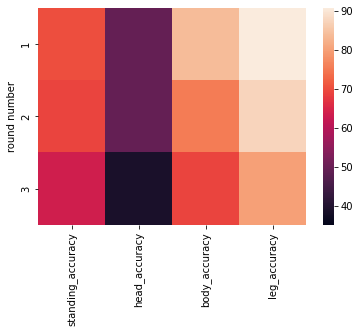

In [25]:
accuracy_heat_map = sapr[['standing_accuracy', 'head_accuracy', 'body_accuracy', 'leg_accuracy']]
accuracy_heat_map.index += 1
sns.heatmap(data=accuracy_heat_map, vmin=35)
plt.ylabel('round number')

# Charles Oliveira 2018-2021 (10-0)

In [26]:
df2 = pd.read_csv('charles_champ_run.csv', error_bad_lines=False)

df2.dropna()

df2['seconds'] = df2.control_time.str.split(':',expand=True)[1]
df2['minutes'] = df2.control_time.str.split(':',expand=True)[0]

df2['seconds'] = df2['seconds'].astype(int)
df2['minutes'] = df2['minutes'].astype(int)

df2['control_time'] = (df2['minutes'] * 60) + df2['seconds']
df2 = df2.drop(columns=['seconds','minutes'])


df2['seconds'] = df2.ending_time.str.split(':',expand=True)[1]
df2['minutes'] = df2.ending_time.str.split(':',expand=True)[0]

df2['seconds'] = df2['seconds'].astype(int)
df2['minutes'] = df2['minutes'].astype(int)

df2['ending_time'] = (df2['minutes'] * 60) + df2['seconds']
df2 = df2.drop(columns=['seconds','minutes'])

df2['standing_time'] = df2.ending_time - df2.control_time

df2.loc[df2.round_number != df2.ending_round,'ending_time'] = 300
print(df2.columns)

Index(['fight_id', 'fight_title', 'winning_fighter_name',
       'losing_fighter_name', 'weight_class', 'method_of_victory',
       'specific_victory_details', 'ending_round', 'ending_time', 'fight_url',
       'unique_round_id', 'unique_fight_id', 'unique_event_id', 'round_number',
       'fighter_name', 'knockdowns', 'total_strikes_landed',
       'total_strikes_attempted', 'takedowns', 'takedowns_attempted',
       'submission_attempts', 'guard_passes', 'reversals', 'control_time',
       'unique_round_id.1', 'unique_fight_id.1', 'unique_event_id.1',
       'round_number.1', 'fighter_name.1', 'significant_strikes_head_landed',
       'significant_strikes_head_attempted', 'significant_strikes_body_landed',
       'significant_strikes_body_attempted', 'significant_strikes_leg_landed',
       'significant_strikes_leg_attempted',
       'significant_strikes_standing_landed',
       'significant_strikes_standing_attempted',
       'significant_strikes_clinch_landed',
       'significant_

In [27]:
df2.head(5)

,fight_id,fight_title,winning_fighter_name,losing_fighter_name,weight_class,method_of_victory,specific_victory_details,ending_round,ending_time,fight_url,unique_round_id,unique_fight_id,unique_event_id,round_number,fighter_name,knockdowns,total_strikes_landed,total_strikes_attempted,takedowns,takedowns_attempted,submission_attempts,guard_passes,reversals,control_time,unique_round_id.1,unique_fight_id.1,unique_event_id.1,round_number.1,fighter_name.1,significant_strikes_head_landed,significant_strikes_head_attempted,significant_strikes_body_landed,significant_strikes_body_attempted,significant_strikes_leg_landed,significant_strikes_leg_attempted,significant_strikes_standing_landed,significant_strikes_standing_attempted,significant_strikes_clinch_landed,significant_strikes_clinch_attempted,significant_strikes_ground_landed,significant_strikes_ground_attempted,event_id,event_title,event_date,event_location,event_attendance,event_url,standing_time
0,23,UFC Fight Night: Lee vs. Oliveira,Charles Oliveira,Kevin Lee,Lightweight,SUB,Guillotine Choke,3,300,e0b323dae5bf4c90,114,23,3,1,Charles Oliveira,0,16,21,0,1,0,0.0,1,11,114,23,3,1,Charles Oliveira,8,12,1,2,4,4,10,15,0,0,3,3,3,UFC Fight Night: Lee vs. Oliveira,2020-03-14,"Brasilia, Distrito Federa",0,53278852bcd91e11,17
1,23,UFC Fight Night: Lee vs. Oliveira,Charles Oliveira,Kevin Lee,Lightweight,SUB,Guillotine Choke,3,300,e0b323dae5bf4c90,116,23,3,2,Charles Oliveira,0,33,47,0,0,1,0.0,0,0,116,23,3,2,Charles Oliveira,19,33,7,7,2,2,23,36,2,2,3,4,3,UFC Fight Night: Lee vs. Oliveira,2020-03-14,"Brasilia, Distrito Federa",0,53278852bcd91e11,28
2,23,UFC Fight Night: Lee vs. Oliveira,Charles Oliveira,Kevin Lee,Lightweight,SUB,Guillotine Choke,3,28,e0b323dae5bf4c90,118,23,3,3,Charles Oliveira,0,2,5,0,0,1,0.0,0,0,118,23,3,3,Charles Oliveira,1,4,1,1,0,0,2,5,0,0,0,0,3,UFC Fight Night: Lee vs. Oliveira,2020-03-14,"Brasilia, Distrito Federa",0,53278852bcd91e11,28
3,277,UFC Fight Night: Lee vs. Iaquinta,Charles Oliveira,Jim Miller,Lightweight,SUB,Rear Naked Choke,1,75,f3e289f1423c0e6f,134,277,27,1,Charles Oliveira,0,1,2,1,1,1,1.0,0,47,134,277,27,1,Charles Oliveira,0,0,0,0,0,1,0,1,0,0,0,0,27,UFC Fight Night: Lee vs. Iaquinta,2018-12-15,"Milwaukee, Wisconsin, USA","9,010",7a703c565ccaa18f,28
4,941,UFC 225: Whittaker vs. Romero 2,Charles Oliveira,Clay Guida,Lightweight,SUB,Guillotine Choke,1,138,e82d734674ce4d46,450,941,86,1,Charles Oliveira,0,14,29,0,0,1,0.0,0,2,450,941,86,1,Charles Oliveira,6,18,1,2,7,9,14,28,0,1,0,0,86,UFC 225: Whittaker vs. Romero 2,2018-06-09,"Chicago, Illinois, USA","18,117",2eae41f61776c60f,136


In [28]:
df2.tail(5)

,fight_id,fight_title,winning_fighter_name,losing_fighter_name,weight_class,method_of_victory,specific_victory_details,ending_round,ending_time,fight_url,unique_round_id,unique_fight_id,unique_event_id,round_number,fighter_name,knockdowns,total_strikes_landed,total_strikes_attempted,takedowns,takedowns_attempted,submission_attempts,guard_passes,reversals,control_time,unique_round_id.1,unique_fight_id.1,unique_event_id.1,round_number.1,fighter_name.1,significant_strikes_head_landed,significant_strikes_head_attempted,significant_strikes_body_landed,significant_strikes_body_attempted,significant_strikes_leg_landed,significant_strikes_leg_attempted,significant_strikes_standing_landed,significant_strikes_standing_attempted,significant_strikes_clinch_landed,significant_strikes_clinch_attempted,significant_strikes_ground_landed,significant_strikes_ground_attempted,event_id,event_title,event_date,event_location,event_attendance,event_url,standing_time
15,8130,UFC 262: Oliveira vs. Chandler,Charles Oliveira,Michael Chandler,Lightweight,KO/TKO,Punch,2,300,fef29aa73bd5b907,34399,8130,921,1,Charles Oliveira,0,18,24,1,2,0,NaN,0,99,34399,8130,921,1,Charles Oliveira,6,10,1,2,3,3,7,11,0,0,3,4,921,UFC 262: Oliveira vs. Chandler,2021-05-15,"Houston, Texas, USA",NaN,744f50016c39c26c,-80
16,8130,UFC 262: Oliveira vs. Chandler,Charles Oliveira,Michael Chandler,Lightweight,KO/TKO,Punch,2,19,fef29aa73bd5b907,34401,8130,921,2,Charles Oliveira,2,14,17,0,0,0,NaN,0,3,34401,8130,921,2,Charles Oliveira,14,16,0,1,0,0,6,9,3,3,5,5,921,UFC 262: Oliveira vs. Chandler,2021-05-15,"Houston, Texas, USA",NaN,744f50016c39c26c,16
17,8651,UFC 269: Oliveira vs. Poirier,Charles Oliveira,Dustin Poirier,Lightweight,SUB,Rear Naked Choke,3,300,b22eab3aa1522f40,36849,8651,991,1,Charles Oliveira,0,51,96,0,2,0,NaN,0,26,36849,8651,991,1,Charles Oliveira,28,66,17,23,3,3,35,76,13,15,0,1,991,UFC 269: Oliveira vs. Poirier,2021-12-11,"Las Vegas, Nevada, USA",NaN,ef927e4fe2117ab8,36
18,8651,UFC 269: Oliveira vs. Poirier,Charles Oliveira,Dustin Poirier,Lightweight,SUB,Rear Naked Choke,3,300,b22eab3aa1522f40,36851,8651,991,2,Charles Oliveira,0,45,54,0,3,0,NaN,1,267,36851,8651,991,2,Charles Oliveira,19,27,4,5,0,0,2,4,3,3,18,25,991,UFC 269: Oliveira vs. Poirier,2021-12-11,"Las Vegas, Nevada, USA",NaN,ef927e4fe2117ab8,-205
19,8651,UFC 269: Oliveira vs. Poirier,Charles Oliveira,Dustin Poirier,Lightweight,SUB,Rear Naked Choke,3,62,b22eab3aa1522f40,36853,8651,991,3,Charles Oliveira,0,2,7,0,1,3,NaN,0,48,36853,8651,991,3,Charles Oliveira,1,6,1,1,0,0,1,6,1,1,0,0,991,UFC 269: Oliveira vs. Poirier,2021-12-11,"Las Vegas, Nevada, USA",NaN,ef927e4fe2117ab8,14


In [29]:
# creating the group frame

group_frame_wins = df2[['fighter_name', 'significant_strikes_standing_attempted', 'significant_strikes_standing_landed','significant_strikes_head_attempted','significant_strikes_body_attempted','significant_strikes_leg_attempted', 'significant_strikes_ground_attempted', 'significant_strikes_clinch_attempted', 'knockdowns', 'standing_time' ]].groupby('fighter_name').sum().reset_index()
group_frame_wins.head(3)

,fighter_name,significant_strikes_standing_attempted,significant_strikes_standing_landed,significant_strikes_head_attempted,significant_strikes_body_attempted,significant_strikes_leg_attempted,significant_strikes_ground_attempted,significant_strikes_clinch_attempted,knockdowns,standing_time
0,Charles Oliveira,373,191,359,103,52,83,58,4,888


In [30]:
group_frame_wins.fighter_name = 'Champ Oliveira'
print(group_frame_wins)

     fighter_name  significant_strikes_standing_attempted  \
0  Champ Oliveira                                     373   

   significant_strikes_standing_landed  significant_strikes_head_attempted  \
0                                  191                                 359   

   significant_strikes_body_attempted  significant_strikes_leg_attempted  \
0                                 103                                 52   

   significant_strikes_ground_attempted  significant_strikes_clinch_attempted  \
0                                    83                                    58   

   knockdowns  standing_time  
0           4            888  


In [31]:
group_frame_wins['head_ratio'] = group_frame_wins.significant_strikes_head_attempted / (group_frame_wins.significant_strikes_head_attempted + group_frame_wins.significant_strikes_body_attempted + group_frame_wins.significant_strikes_leg_attempted)
group_frame_wins['body_ratio'] = group_frame_wins.significant_strikes_body_attempted / (group_frame_wins.significant_strikes_head_attempted + group_frame_wins.significant_strikes_body_attempted + group_frame_wins.significant_strikes_leg_attempted)
group_frame_wins['leg_ratio'] = group_frame_wins.significant_strikes_leg_attempted / (group_frame_wins.significant_strikes_head_attempted + group_frame_wins.significant_strikes_body_attempted + group_frame_wins.significant_strikes_leg_attempted)


In [74]:
ratio_frame_wins = group_frame_wins[['fighter_name', 'head_ratio', 'body_ratio', 'leg_ratio' ]]
print('Mix Strikes')
ratio_frame_wins

Mix Strikes


,fighter_name,head_ratio,body_ratio,leg_ratio
0,Champ Oliveira,0.698444,0.200389,0.101167


In [33]:
#STRIKE LOCATION
location_ratio_wins = group_frame_wins[['fighter_name', 'significant_strikes_standing_attempted', 'significant_strikes_ground_attempted', 'significant_strikes_clinch_attempted']].groupby('fighter_name').sum().reset_index()

In [34]:
location_ratio_wins['standing_ratio'] = location_ratio_wins.significant_strikes_standing_attempted / (location_ratio_wins.significant_strikes_standing_attempted + location_ratio_wins.significant_strikes_ground_attempted + location_ratio_wins.significant_strikes_clinch_attempted)
location_ratio_wins['ground_ratio'] = location_ratio_wins.significant_strikes_ground_attempted / (location_ratio_wins.significant_strikes_standing_attempted + location_ratio_wins.significant_strikes_ground_attempted + location_ratio_wins.significant_strikes_clinch_attempted)
location_ratio_wins['clinch_ratio'] = location_ratio_wins.significant_strikes_clinch_attempted / (location_ratio_wins.significant_strikes_standing_attempted + location_ratio_wins.significant_strikes_ground_attempted + location_ratio_wins.significant_strikes_clinch_attempted)

print('Strike Location')
print(location_ratio_wins[['fighter_name', 'standing_ratio', 'ground_ratio', 'clinch_ratio']])

Strike Location
     fighter_name  standing_ratio  ground_ratio  clinch_ratio
0  Champ Oliveira        0.725681      0.161479       0.11284


In [35]:
# Turn standing time to minutes
group_frame_wins['standing_time']=group_frame_wins.standing_time/60

In [36]:
#SApSM
sapsm_wins = group_frame_wins[['fighter_name', 'significant_strikes_standing_attempted','standing_time', 'knockdowns']].groupby('fighter_name').sum().reset_index()


In [75]:
#SApSM_Ratio
sapsm_wins['SApSM'] = sapsm_wins.significant_strikes_standing_attempted / sapsm_wins.standing_time
print('Standing Attempts per Standing minute')
sapsm_wins

Standing Attempts per Standing minute


,fighter_name,significant_strikes_standing_attempted,standing_time,knockdowns,SApSM
0,Champ Oliveira,373,14.8,4,25.202703


In [38]:
#SLpSM
slpsm_wins = group_frame_wins[['fighter_name', 'significant_strikes_standing_landed','standing_time', 'knockdowns']].groupby('fighter_name').sum().reset_index()


In [76]:
#SLpSM Ratio
slpsm_wins['SLpSM'] = slpsm_wins.significant_strikes_standing_landed / slpsm_wins.standing_time
print('Standing Lands per standing minute')
slpsm_wins

Standing Lands per standing minute


,fighter_name,significant_strikes_standing_landed,standing_time,knockdowns,SLpSM
0,Champ Oliveira,191,14.8,4,12.905405


In [78]:
accuracy_frame_wins = group_frame_wins[['significant_strikes_standing_landed', 'significant_strikes_standing_attempted', 'fighter_name']].groupby('fighter_name').sum().reset_index()

accuracy_frame_wins['standing_accuracy'] = accuracy_frame_wins.significant_strikes_standing_landed/accuracy_frame_wins.significant_strikes_standing_attempted * 100
print('Overall Career Accuracy')
accuracy_frame_wins

Overall Career Accuracy


,fighter_name,significant_strikes_standing_landed,significant_strikes_standing_attempted,standing_accuracy
0,Champ Oliveira,191,373,51.206434


In [79]:
# Minutes Standing per Knockdown
kd_frame_wins = group_frame_wins[['standing_time', 'knockdowns', 'fighter_name']].groupby('fighter_name').sum().reset_index()
kd_frame_wins['SMpKD'] = kd_frame_wins.standing_time / kd_frame_wins.knockdowns
print('Standing Minutes per Knockdown')
kd_frame_wins

Standing Minutes per Knockdown


,fighter_name,standing_time,knockdowns,SMpKD
0,Champ Oliveira,14.8,4,3.7


In [80]:
kdstrike_frame_wins = group_frame_wins[['significant_strikes_standing_landed', 'knockdowns', 'fighter_name']].groupby('fighter_name').sum().reset_index()

kdstrike_frame_wins['SLpKD'] = kdstrike_frame_wins.significant_strikes_standing_landed / kdstrike_frame_wins.knockdowns
print('Strike Lands per knockdown')
kdstrike_frame_wins

Strike Lands per knockdown


,fighter_name,significant_strikes_standing_landed,knockdowns,SLpKD
0,Champ Oliveira,191,4,47.75


In [81]:
#striking accuray per round 

sapr_wins = df2[['total_strikes_landed', 'total_strikes_attempted', 'fighter_name', 'round_number', 'significant_strikes_head_attempted', 'significant_strikes_head_landed', 'significant_strikes_body_attempted', 'significant_strikes_body_landed', 'significant_strikes_leg_attempted', 'significant_strikes_leg_landed', 'standing_time']].groupby(['fighter_name', 'round_number']).mean().reset_index()
sapr_wins['standing_time']=sapr_wins.standing_time/60
sapr_wins['standing_accuracy'] = (sapr_wins.total_strikes_landed / sapr_wins.total_strikes_attempted) * 100

sapr_wins.fighter_name = 'Champ Oliveira'
# graphs for head accuracy, body accuracy and leg accuracy by round

sapr_wins['head_accuracy']=(sapr_wins.significant_strikes_head_landed/sapr_wins.significant_strikes_head_attempted)*100
sapr_wins['body_accuracy']=(sapr_wins.significant_strikes_body_landed/sapr_wins.significant_strikes_body_attempted)*100
sapr_wins['leg_accuracy']=(sapr_wins.significant_strikes_leg_landed/sapr_wins.significant_strikes_leg_attempted)*100

print('Standing Accuracy by round')
sapr_wins[['fighter_name', 'round_number', 'standing_accuracy', 'head_accuracy', 'body_accuracy', 'leg_accuracy']]


Standing Accuracy by round


,fighter_name,round_number,standing_accuracy,head_accuracy,body_accuracy,leg_accuracy
0,Champ Oliveira,1,56.976744,47.290640,53.968254,82.051282
1,Champ Oliveira,2,74.561404,62.686567,76.470588,100.000000
2,Champ Oliveira,3,65.116279,45.454545,83.333333,66.666667


Text(33.0, 0.5, 'round number')

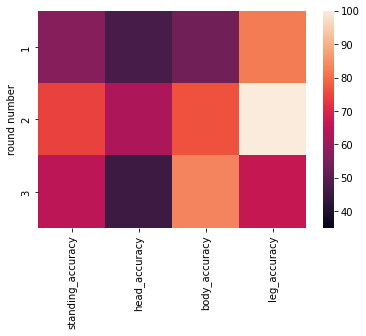

In [44]:

heat_map_ = sapr_wins[['standing_accuracy', 'head_accuracy', 'body_accuracy', 'leg_accuracy']]
heat_map_.index += 1
sns.heatmap(data=heat_map_, vmin=35)
plt.ylabel('round number')

Lets compare charles to historical lightweight and featherweight data. This is used to compare striking by a weightclass basis. First lets inspect striking across Charles' two weight classes featherweight and lightweight

In [45]:
df_fw = pd.read_csv('fw_historical.csv', error_bad_lines=False)
df_fw.dropna()

df_fw = df_fw.loc[df_fw.control_time != '--']


df_fw['seconds'] = df_fw['control_time'].str.split(':',expand=True)[1]
df_fw['minutes'] = df_fw['control_time'].str.split(':',expand=True)[0]

df_fw['seconds'] = df_fw['seconds'].astype(dtype=int)
df_fw['minutes'] = df_fw['minutes'].astype(dtype=int)

df_fw['control_time'] = (df_fw['minutes'] * 60) + df_fw['seconds']
df_fw = df_fw.drop(columns=['seconds','minutes'])


df_fw['seconds'] = df_fw.ending_time.str.split(':',expand=True)[1]
df_fw['minutes'] = df_fw.ending_time.str.split(':',expand=True)[0]

df_fw['seconds'] = df_fw['seconds'].astype(int)
df_fw['minutes'] = df_fw['minutes'].astype(int)

df_fw['ending_time'] = (df_fw['minutes'] * 60) + df_fw['seconds']
df_fw = df_fw.drop(columns=['seconds','minutes'])

df_fw['standing_time'] = df_fw.ending_time - df_fw.control_time

df_fw.loc[df_fw.round_number != df_fw.ending_round,'ending_time'] = 300
print(df_fw.columns)

Index(['fight_id', 'fight_title', 'winning_fighter_name',
       'losing_fighter_name', 'weight_class', 'method_of_victory',
       'specific_victory_details', 'ending_round', 'ending_time', 'fight_url',
       'unique_round_id', 'unique_fight_id', 'unique_event_id', 'round_number',
       'fighter_name', 'knockdowns', 'total_strikes_landed',
       'total_strikes_attempted', 'takedowns', 'takedowns_attempted',
       'submission_attempts', 'guard_passes', 'reversals', 'control_time',
       'unique_round_id.1', 'unique_fight_id.1', 'unique_event_id.1',
       'round_number.1', 'fighter_name.1', 'significant_strikes_head_landed',
       'significant_strikes_head_attempted', 'significant_strikes_body_landed',
       'significant_strikes_body_attempted', 'significant_strikes_leg_landed',
       'significant_strikes_leg_attempted',
       'significant_strikes_standing_landed',
       'significant_strikes_standing_attempted',
       'significant_strikes_clinch_landed',
       'significant_

In [46]:
df_fw.head()

,fight_id,fight_title,winning_fighter_name,losing_fighter_name,weight_class,method_of_victory,specific_victory_details,ending_round,ending_time,fight_url,unique_round_id,unique_fight_id,unique_event_id,round_number,fighter_name,knockdowns,total_strikes_landed,total_strikes_attempted,takedowns,takedowns_attempted,submission_attempts,guard_passes,reversals,control_time,unique_round_id.1,unique_fight_id.1,unique_event_id.1,round_number.1,fighter_name.1,significant_strikes_head_landed,significant_strikes_head_attempted,significant_strikes_body_landed,significant_strikes_body_attempted,significant_strikes_leg_landed,significant_strikes_leg_attempted,significant_strikes_standing_landed,significant_strikes_standing_attempted,significant_strikes_clinch_landed,significant_strikes_clinch_attempted,significant_strikes_ground_landed,significant_strikes_ground_attempted,standing_time
0,710,UFC Fight Night: Belfort vs Henderson,Thiago Tavares,Clay Guida,Featherweight,SUB,Guillotine Choke,1,39,b21e4b6c4126c782,451,710,64,1,Clay Guida,0,3,11,1,1,0,0,0,18,451,710,64,1,Clay Guida,2,10,0,0,1,1,3,11,0,0,0,0,21
1,710,UFC Fight Night: Belfort vs Henderson,Thiago Tavares,Clay Guida,Featherweight,SUB,Guillotine Choke,1,39,b21e4b6c4126c782,452,710,64,1,Thiago Tavares,0,2,7,0,0,1,0,0,1,452,710,64,1,Thiago Tavares,2,7,0,0,0,0,2,7,0,0,0,0,38
2,1913,UFC 199: Rockhold vs. Bisping 2,Brian Ortega,Clay Guida,Featherweight,KO/TKO,Knee,3,300,db1be0ca226d3a2f,453,1913,179,1,Brian Ortega,0,5,29,0,0,0,0,0,0,453,1913,179,1,Brian Ortega,4,27,1,2,0,0,5,29,0,0,0,0,280
3,1913,UFC 199: Rockhold vs. Bisping 2,Brian Ortega,Clay Guida,Featherweight,KO/TKO,Knee,3,300,db1be0ca226d3a2f,454,1913,179,1,Clay Guida,1,25,72,0,3,0,0,0,30,454,1913,179,1,Clay Guida,12,47,1,4,4,4,15,53,2,2,0,0,250
4,1913,UFC 199: Rockhold vs. Bisping 2,Brian Ortega,Clay Guida,Featherweight,KO/TKO,Knee,3,300,db1be0ca226d3a2f,455,1913,179,2,Brian Ortega,0,25,77,0,0,0,0,0,2,455,1913,179,2,Brian Ortega,20,70,5,7,0,0,24,74,1,3,0,0,278


In [47]:
df_fw.tail()

,fight_id,fight_title,winning_fighter_name,losing_fighter_name,weight_class,method_of_victory,specific_victory_details,ending_round,ending_time,fight_url,unique_round_id,unique_fight_id,unique_event_id,round_number,fighter_name,knockdowns,total_strikes_landed,total_strikes_attempted,takedowns,takedowns_attempted,submission_attempts,guard_passes,reversals,control_time,unique_round_id.1,unique_fight_id.1,unique_event_id.1,round_number.1,fighter_name.1,significant_strikes_head_landed,significant_strikes_head_attempted,significant_strikes_body_landed,significant_strikes_body_attempted,significant_strikes_leg_landed,significant_strikes_leg_attempted,significant_strikes_standing_landed,significant_strikes_standing_attempted,significant_strikes_clinch_landed,significant_strikes_clinch_attempted,significant_strikes_ground_landed,significant_strikes_ground_attempted,standing_time
995,1276,UFC Fight Night: Lewis vs. Dos Santos,Grant Dawson,Julian Erosa,Featherweight,U-DEC,NaN,3,300,ddcfa590f4644240,7476,1276,119,2,Julian Erosa,0,38,60,0,0,0,0,0,17,7476,1276,119,2,Julian Erosa,22,39,9,13,3,3,24,43,8,10,2,2,283
996,1276,UFC Fight Night: Lewis vs. Dos Santos,Grant Dawson,Julian Erosa,Featherweight,U-DEC,NaN,3,300,ddcfa590f4644240,7477,1276,119,3,Grant Dawson,0,36,53,1,1,1,3,0,257,7477,1276,119,3,Grant Dawson,19,31,0,0,2,2,4,9,0,0,17,24,43
997,1276,UFC Fight Night: Lewis vs. Dos Santos,Grant Dawson,Julian Erosa,Featherweight,U-DEC,NaN,3,300,ddcfa590f4644240,7478,1276,119,3,Julian Erosa,0,10,18,0,0,0,0,0,0,7478,1276,119,3,Julian Erosa,5,10,0,1,0,0,3,9,0,0,2,2,300
998,2242,UFC Fight Night: Thompson vs. Pettis,Luis Pena,Steven Peterson,Featherweight,U-DEC,NaN,3,300,3812b265afd78186,7485,2242,211,1,Luis Pena,0,21,34,0,1,0,1,1,134,7485,2242,211,1,Luis Pena,13,26,3,3,0,0,7,16,7,11,2,2,166
999,2242,UFC Fight Night: Thompson vs. Pettis,Luis Pena,Steven Peterson,Featherweight,U-DEC,NaN,3,300,3812b265afd78186,7486,2242,211,1,Steven Peterson,0,21,40,1,3,0,0,0,79,7486,2242,211,1,Steven Peterson,2,18,5,7,6,6,10,25,3,6,0,0,221


In [48]:
df_fw.shape

(978, 42)

In [49]:
# creating the group frame

group_frame_fw = df_fw[['fighter_name', 'significant_strikes_standing_attempted', 'significant_strikes_standing_landed','significant_strikes_head_attempted','significant_strikes_body_attempted','significant_strikes_leg_attempted', 'significant_strikes_ground_attempted', 'significant_strikes_clinch_attempted', 'knockdowns', 'standing_time' ]].groupby('fighter_name').sum().reset_index()
group_frame_fw.head(30)

,fighter_name,significant_strikes_standing_attempted,significant_strikes_standing_landed,significant_strikes_head_attempted,significant_strikes_body_attempted,significant_strikes_leg_attempted,significant_strikes_ground_attempted,significant_strikes_clinch_attempted,knockdowns,standing_time
0,Akira Corassani,32,11,24,4,5,0,1,0,229
1,Alex Caceres,580,250,509,87,44,20,40,2,4137
2,Alex White,180,81,137,47,18,8,14,1,917
3,Alexander Volkanovski,513,283,393,58,135,27,46,3,2730
4,Alexandre Franca Nogueira,23,4,21,0,4,0,2,0,383
5,Andre Fili,1055,385,984,84,88,67,34,3,5243
6,Andy Ogle,141,48,117,33,8,16,1,0,672
7,Anistavio Medeiros,18,8,12,0,6,0,0,0,132
8,Arnold Allen,549,230,506,64,37,38,20,2,3721
9,Artem Lobov,813,333,621,102,126,6,30,0,4719


In [50]:
group_frame_fw['head_ratio'] = group_frame_fw.significant_strikes_head_attempted / (group_frame_fw.significant_strikes_head_attempted + group_frame_fw.significant_strikes_body_attempted + group_frame_fw.significant_strikes_leg_attempted)
group_frame_fw['body_ratio'] = group_frame_fw.significant_strikes_body_attempted / (group_frame_fw.significant_strikes_head_attempted + group_frame_fw.significant_strikes_body_attempted + group_frame_fw.significant_strikes_leg_attempted)
group_frame_fw['leg_ratio'] = group_frame_fw.significant_strikes_leg_attempted / (group_frame_fw.significant_strikes_head_attempted + group_frame_fw.significant_strikes_body_attempted + group_frame_fw.significant_strikes_leg_attempted)


In [51]:
ratio_frame_fw = group_frame_fw[['fighter_name', 'head_ratio', 'body_ratio', 'leg_ratio' ]]
print('Mix Strikes')
ratio_frame_fw.head(148)

Mix Strikes


,fighter_name,head_ratio,body_ratio,leg_ratio
0,Akira Corassani,0.727273,0.121212,0.151515
1,Alex Caceres,0.795312,0.135937,0.068750
2,Alex White,0.678218,0.232673,0.089109
3,Alexander Volkanovski,0.670648,0.098976,0.230375
4,Alexandre Franca Nogueira,0.840000,0.000000,0.160000
...,...,...,...,...
143,Yair Rodriguez,0.747021,0.123740,0.129239
144,Yaotzin Meza,0.704918,0.131148,0.163934
145,Yui Chul Nam,0.700000,0.227778,0.072222
146,Zabit Magomedsharipov,0.753425,0.121005,0.125571


In [52]:
print('Average Strike Mix ratiosof Featherweight')
ratio_frame_fw.mean()

Average Strike Mix ratiosof Featherweight


head_ratio    0.783072
body_ratio    0.125097
leg_ratio     0.091831
dtype: float64

In [53]:
#STRIKE LOCATION
location_ratio_fw = group_frame_fw[['fighter_name', 'significant_strikes_standing_attempted', 'significant_strikes_ground_attempted', 'significant_strikes_clinch_attempted']].groupby('fighter_name').sum().reset_index()

In [54]:
location_ratio_fw['standing_ratio'] = location_ratio_fw.significant_strikes_standing_attempted / (location_ratio_fw.significant_strikes_standing_attempted + location_ratio_fw.significant_strikes_ground_attempted + location_ratio_fw.significant_strikes_clinch_attempted)
location_ratio_fw['ground_ratio'] = location_ratio_fw.significant_strikes_ground_attempted / (location_ratio_fw.significant_strikes_standing_attempted + location_ratio_fw.significant_strikes_ground_attempted + location_ratio_fw.significant_strikes_clinch_attempted)
location_ratio_fw['clinch_ratio'] = location_ratio_fw.significant_strikes_clinch_attempted / (location_ratio_fw.significant_strikes_standing_attempted + location_ratio_fw.significant_strikes_ground_attempted + location_ratio_fw.significant_strikes_clinch_attempted)

print('Strike Location')
location_ratio_fw[['fighter_name', 'standing_ratio', 'ground_ratio', 'clinch_ratio']]

Strike Location


,fighter_name,standing_ratio,ground_ratio,clinch_ratio
0,Akira Corassani,0.969697,0.000000,0.030303
1,Alex Caceres,0.906250,0.031250,0.062500
2,Alex White,0.891089,0.039604,0.069307
3,Alexander Volkanovski,0.875427,0.046075,0.078498
4,Alexandre Franca Nogueira,0.920000,0.000000,0.080000
...,...,...,...,...
143,Yair Rodriguez,0.808433,0.143905,0.047663
144,Yaotzin Meza,0.918033,0.000000,0.081967
145,Yui Chul Nam,0.500000,0.183333,0.316667
146,Zabit Magomedsharipov,0.831050,0.127854,0.041096


In [55]:
print('Average FW Fight locations')
location_ratio_fw[['fighter_name', 'standing_ratio', 'ground_ratio', 'clinch_ratio']].mean()


Average FW Fight locations


standing_ratio    0.808510
ground_ratio      0.096566
clinch_ratio      0.094923
dtype: float64

In [56]:
# Turn standing time to minutes
group_frame_fw['standing_time']=group_frame_fw.standing_time/60

In [57]:
#SApSM
sapsm_fw = group_frame_fw[['fighter_name', 'significant_strikes_standing_attempted','standing_time', 'knockdowns']].groupby('fighter_name').sum().reset_index()


In [58]:
#SApSM_Ratio
sapsm_fw['SApSM'] = sapsm_fw.significant_strikes_standing_attempted / sapsm_fw.standing_time
print('Standing Attempts per Standing minute')
print(sapsm_fw)

Standing Attempts per Standing minute
                   fighter_name  significant_strikes_standing_attempted  \
0               Akira Corassani                                      32   
1                  Alex Caceres                                     580   
2                    Alex White                                     180   
3         Alexander Volkanovski                                     513   
4    Alexandre Franca Nogueira                                       23   
..                          ...                                     ...   
143              Yair Rodriguez                                     882   
144                Yaotzin Meza                                      56   
145                Yui Chul Nam                                      90   
146       Zabit Magomedsharipov                                     364   
147            Zubaira Tukhugov                                      22   

     standing_time  knockdowns      SApSM  
0         3.81666

In [59]:
print(f'Average strike Attempts per standing minute of FW: {sapsm_fw.SApSM.mean()}')

Average strike Attempts per standing minute of FW: 18.646684769538453


In [60]:
#SLpSM
slpsm_fw = group_frame_fw[['fighter_name', 'significant_strikes_standing_landed','standing_time', 'knockdowns']].groupby('fighter_name').sum().reset_index()


In [61]:
#SLpSM Ratio
slpsm_fw['SLpSM'] = slpsm_fw.significant_strikes_standing_landed / slpsm_fw.standing_time
print('Standing Lands per standing minute')
print(slpsm_fw)

Standing Lands per standing minute
                   fighter_name  significant_strikes_standing_landed  \
0               Akira Corassani                                   11   
1                  Alex Caceres                                  250   
2                    Alex White                                   81   
3         Alexander Volkanovski                                  283   
4    Alexandre Franca Nogueira                                     4   
..                          ...                                  ...   
143              Yair Rodriguez                                  366   
144                Yaotzin Meza                                   21   
145                Yui Chul Nam                                   26   
146       Zabit Magomedsharipov                                  159   
147            Zubaira Tukhugov                                   15   

     standing_time  knockdowns     SLpSM  
0         3.816667           0  2.882096  
1        68.95

In [62]:
print(f'Average strike Lands per striking minute of FW: {slpsm_fw.SLpSM.mean()}')

Average strike Lands per striking minute of FW: 8.122281753160623


In [63]:
accuracy_frame_fw = group_frame_fw[['significant_strikes_standing_landed', 'significant_strikes_standing_attempted', 'fighter_name']].groupby('fighter_name').sum().reset_index()

accuracy_frame_fw['standing_accuracy'] = accuracy_frame_fw.significant_strikes_standing_landed/accuracy_frame_fw.significant_strikes_standing_attempted * 100
print('Overall Career Accuracy')
print(accuracy_frame_fw)

Overall Career Accuracy
                   fighter_name  significant_strikes_standing_landed  \
0               Akira Corassani                                   11   
1                  Alex Caceres                                  250   
2                    Alex White                                   81   
3         Alexander Volkanovski                                  283   
4    Alexandre Franca Nogueira                                     4   
..                          ...                                  ...   
143              Yair Rodriguez                                  366   
144                Yaotzin Meza                                   21   
145                Yui Chul Nam                                   26   
146       Zabit Magomedsharipov                                  159   
147            Zubaira Tukhugov                                   15   

     significant_strikes_standing_attempted  standing_accuracy  
0                                        32   

<AxesSubplot:xlabel='standing_accuracy', ylabel='Count'>

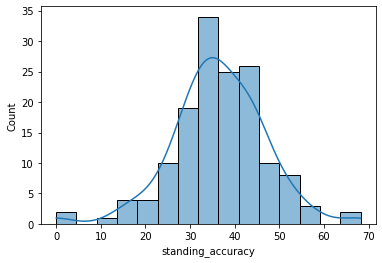

In [64]:
sns.histplot(data=accuracy_frame_fw, x="standing_accuracy", kde=True)

In [65]:
#find the average accuracy for featherweight
perc = "{:.0f}".format(accuracy_frame_fw.standing_accuracy.mean())
perc = int(perc)
print(f'average accuracy for featherweight: {perc}%')


average accuracy for featherweight: 36%


In [66]:
olive_performances = df1[[ 'significant_strikes_standing_attempted', 'significant_strikes_standing_landed', 'unique_round_id', 'event_date', 'winning_fighter_name','losing_fighter_name']]

perc = 0.36
#print(olive_performances.columns)
olive_performances['significant_strikes_standing_attempted'] = olive_performances['significant_strikes_standing_attempted'].astype(int)
olive_performances['expected_strike_lands'] = olive_performances.significant_strikes_standing_attempted * perc

olive_performances.head(20)




<ipython-input-66-ff76b424edf5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  olive_performances['significant_strikes_standing_attempted'] = olive_performances['significant_strikes_standing_attempted'].astype(int)
<ipython-input-66-ff76b424edf5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  olive_performances['expected_strike_lands'] = olive_performances.significant_strikes_standing_attempted * perc


,significant_strikes_standing_attempted,significant_strikes_standing_landed,unique_round_id,event_date,winning_fighter_name,losing_fighter_name,expected_strike_lands
0,10,5,583,2015-12-19,Charles Oliveira,Myles Jury,3.60
1,16,4,848,2015-08-23,Max Holloway,Charles Oliveira,5.76
2,2,0,2680,2014-06-28,Charles Oliveira,Hatsu Hioki,0.72
3,12,3,2682,2014-06-28,Charles Oliveira,Hatsu Hioki,4.32
4,6,2,3104,2017-04-08,Charles Oliveira,Will Brooks,2.16
5,7,3,14806,2016-08-27,Anthony Pettis,Charles Oliveira,2.52
6,51,22,14808,2016-08-27,Anthony Pettis,Charles Oliveira,18.36
7,5,2,14810,2016-08-27,Anthony Pettis,Charles Oliveira,1.80
8,3,1,14814,2016-11-05,Ricardo Lamas,Charles Oliveira,1.08
9,6,5,14816,2016-11-05,Ricardo Lamas,Charles Oliveira,2.16


<AxesSubplot:xlabel='expected_strike_lands', ylabel='significant_strikes_standing_landed'>

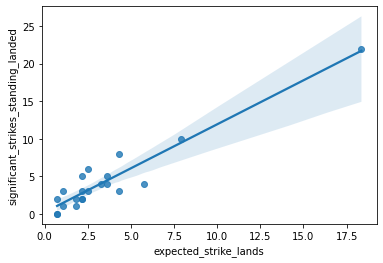

In [67]:
sns.regplot(data=olive_performances, y='significant_strikes_standing_landed', x='expected_strike_lands')

In [68]:
fw_performance = df_fw[[ 'significant_strikes_standing_attempted', 'significant_strikes_standing_landed', 'unique_round_id', 'winning_fighter_name','losing_fighter_name']]

perc = 0.36
#print(fw_performance.columns)
fw_performance['significant_strikes_standing_attempted'] = fw_performance['significant_strikes_standing_attempted'].astype(int)
fw_performance['expected_strike__standing_lands'] = fw_performance.significant_strikes_standing_attempted * perc

fw_performance.head(20)

<ipython-input-68-bc102304186d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fw_performance['significant_strikes_standing_attempted'] = fw_performance['significant_strikes_standing_attempted'].astype(int)
<ipython-input-68-bc102304186d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fw_performance['expected_strike__standing_lands'] = fw_performance.significant_strikes_standing_attempted * perc


,significant_strikes_standing_attempted,significant_strikes_standing_landed,unique_round_id,winning_fighter_name,losing_fighter_name,expected_strike__standing_lands
0,11,3,451,Thiago Tavares,Clay Guida,3.96
1,7,2,452,Thiago Tavares,Clay Guida,2.52
2,29,5,453,Brian Ortega,Clay Guida,10.44
3,53,15,454,Brian Ortega,Clay Guida,19.08
4,74,24,455,Brian Ortega,Clay Guida,26.64
5,70,23,456,Brian Ortega,Clay Guida,25.20
6,82,31,457,Brian Ortega,Clay Guida,29.52
7,65,20,458,Brian Ortega,Clay Guida,23.40
8,61,34,465,Yair Rodriguez,Jeremy Stephens,21.96
9,21,9,466,Yair Rodriguez,Jeremy Stephens,7.56


Expected Strikes is Strike Attempts for every round multiplied by the Average standing accuracy for Featherweight which is 36%

Text(0.5, 1.0, 'Expected strike lands vs. Actual standing lands')

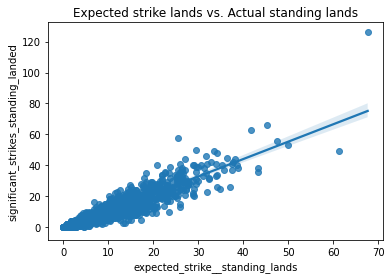

In [69]:
sns.regplot(data=fw_performance, y='significant_strikes_standing_landed', x='expected_strike__standing_lands')
plt.title('Expected strike lands vs. Actual standing lands')

<AxesSubplot:xlabel='significant_strikes_standing_attempted', ylabel='Count'>

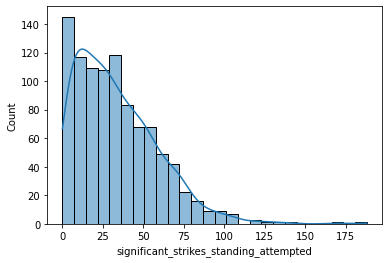

In [70]:
sns.histplot(data=fw_performance, x="significant_strikes_standing_attempted", kde=True, )
#Numbers are lower because these are rounds performances

In [71]:
fw_performance.loc[ fw_performance.significant_strikes_standing_attempted == fw_performance.significant_strikes_standing_attempted.max()]

,significant_strikes_standing_attempted,significant_strikes_standing_landed,unique_round_id,winning_fighter_name,losing_fighter_name,expected_strike__standing_lands
228,188,126,2653,Max Holloway,Brian Ortega,67.68


<AxesSubplot:xlabel='significant_strikes_standing_attempted'>

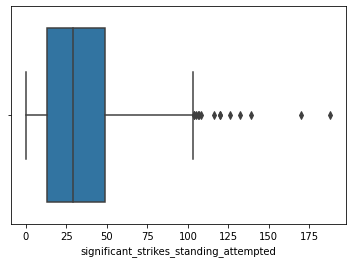

In [72]:
sns.boxplot(data=fw_performance, x="significant_strikes_standing_attempted")

In [82]:
expected_by_target = df_fw[[ 'significant_strikes_head_landed', 'significant_strikes_head_attempted', 'significant_strikes_body_landed', 'significant_strikes_body_attempted', 'significant_strikes_leg_landed','significant_strikes_leg_attempted', 'takedowns_attempted', 'takedowns', 'unique_round_id', 'winning_fighter_name','losing_fighter_name']]

expected_by_target['head_accuracy_fw'] = expected_by_target.significant_strikes_head_landed / expected_by_target.significant_strikes_head_attempted * 100
expected_by_target['body_accuracy_fw'] = expected_by_target.significant_strikes_body_landed / expected_by_target.significant_strikes_body_attempted * 100
expected_by_target['leg_accuracy_fw'] = expected_by_target.significant_strikes_leg_landed / expected_by_target.significant_strikes_leg_attempted * 100


expected_by_target = expected_by_target.dropna()
expected_by_target = expected_by_target.reset_index(drop=True)

head_accuracy_avg = expected_by_target['head_accuracy_fw'].mean()
body_accuracy_avg = expected_by_target['body_accuracy_fw'].mean()
leg_accuracy_avg = expected_by_target['leg_accuracy_fw'].mean()

expected_by_target.head(20)


<ipython-input-82-0428451930d6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expected_by_target['head_accuracy_fw'] = expected_by_target.significant_strikes_head_landed / expected_by_target.significant_strikes_head_attempted * 100
<ipython-input-82-0428451930d6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expected_by_target['body_accuracy_fw'] = expected_by_target.significant_strikes_body_landed / expected_by_target.significant_strikes_body_attempted * 100
<ipython-input-82-0428451930d6>:5: Setting

,significant_strikes_head_landed,significant_strikes_head_attempted,significant_strikes_body_landed,significant_strikes_body_attempted,significant_strikes_leg_landed,significant_strikes_leg_attempted,takedowns_attempted,takedowns,unique_round_id,winning_fighter_name,losing_fighter_name,head_accuracy_fw,body_accuracy_fw,leg_accuracy_fw
0,12,47,1,4,4,4,3,0,454,Brian Ortega,Clay Guida,25.531915,25.000000,100.000000
1,16,62,6,7,3,3,3,0,456,Brian Ortega,Clay Guida,25.806452,85.714286,100.000000
2,28,78,3,4,1,1,0,0,457,Brian Ortega,Clay Guida,35.897436,75.000000,100.000000
3,18,43,9,13,12,14,3,0,465,Yair Rodriguez,Jeremy Stephens,41.860465,69.230769,85.714286
4,3,14,4,4,4,6,0,0,466,Yair Rodriguez,Jeremy Stephens,21.428571,100.000000,66.666667
5,37,67,2,4,2,2,0,0,467,Yair Rodriguez,Jeremy Stephens,55.223881,50.000000,100.000000
6,9,19,2,2,0,1,1,1,468,Yair Rodriguez,Jeremy Stephens,47.368421,100.000000,0.000000
7,10,17,3,6,3,4,0,0,469,Yair Rodriguez,Jeremy Stephens,58.823529,50.000000,75.000000
8,23,43,4,4,1,2,3,2,470,Yair Rodriguez,Jeremy Stephens,53.488372,100.000000,50.000000
9,21,55,3,3,5,5,0,0,473,Jose Aldo,Jeremy Stephens,38.181818,100.000000,100.000000


<AxesSubplot:xlabel='significant_strikes_head_attempted', ylabel='Count'>

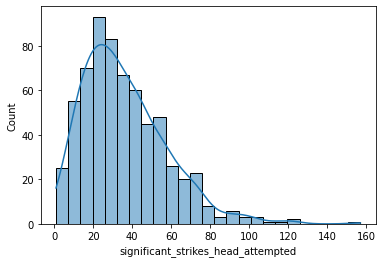

In [83]:
sns.histplot(data=expected_by_target, x="significant_strikes_head_attempted",kde=True)

<AxesSubplot:xlabel='significant_strikes_head_landed', ylabel='significant_strikes_head_attempted'>

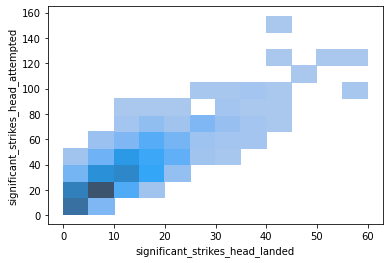

In [84]:
sns.histplot(data=expected_by_target, x="significant_strikes_head_landed", y="significant_strikes_head_attempted" , bins=12)

<AxesSubplot:xlabel='significant_strikes_head_attempted', ylabel='significant_strikes_head_landed'>

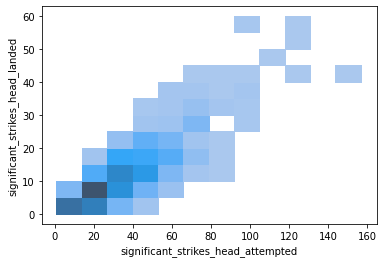

In [85]:
sns.histplot(data=expected_by_target, x="significant_strikes_head_attempted", y="significant_strikes_head_landed" , bins=12)

<AxesSubplot:xlabel='takedowns_attempted', ylabel='significant_strikes_head_attempted'>

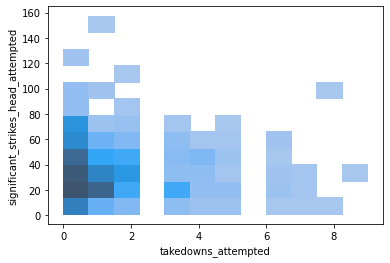

In [86]:
sns.histplot(data=expected_by_target, x="takedowns_attempted", y="significant_strikes_head_attempted" , bins=12)

<AxesSubplot:xlabel='takedowns', ylabel='significant_strikes_head_attempted'>

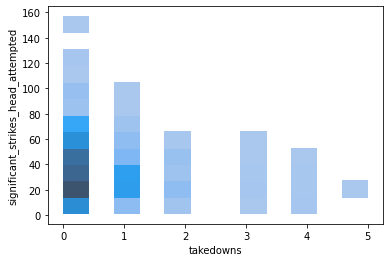

In [87]:
sns.histplot(data=expected_by_target, x="takedowns", y="significant_strikes_head_attempted" , bins=12)

<AxesSubplot:xlabel='takedowns', ylabel='significant_strikes_head_attempted'>

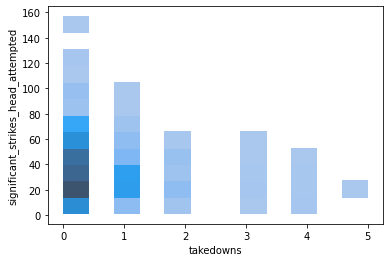

In [88]:
sns.histplot(data=expected_by_target, x="takedowns", y="significant_strikes_head_attempted" , bins=12)

<AxesSubplot:xlabel='takedowns_attempted', ylabel='significant_strikes_head_landed'>

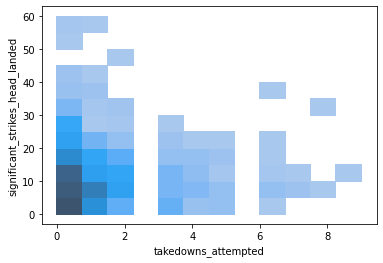

In [89]:
sns.histplot(data=expected_by_target, x="takedowns_attempted", y="significant_strikes_head_landed" , bins=12)

<AxesSubplot:xlabel='head_accuracy_fw', ylabel='Count'>

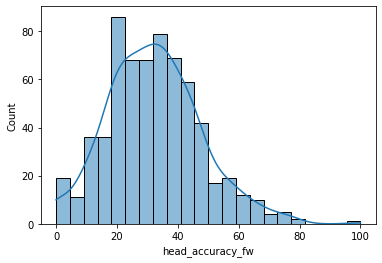

In [90]:
sns.histplot(data=expected_by_target, x="head_accuracy_fw", kde=True)

<AxesSubplot:xlabel='head_accuracy_fw'>

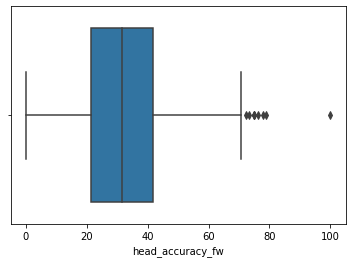

In [91]:
sns.boxplot(data=expected_by_target, x="head_accuracy_fw")

<AxesSubplot:xlabel='significant_strikes_body_attempted', ylabel='Count'>

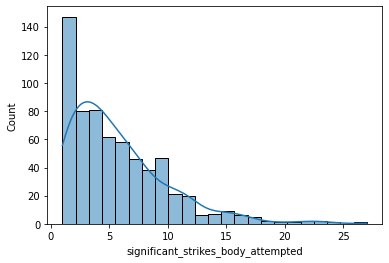

In [92]:
sns.histplot(data=expected_by_target, x="significant_strikes_body_attempted", kde=True)

<AxesSubplot:xlabel='takedowns', ylabel='significant_strikes_body_attempted'>

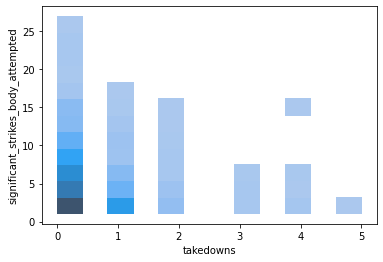

In [93]:
sns.histplot(data=expected_by_target, x="takedowns", y="significant_strikes_body_attempted" , bins=12)

<AxesSubplot:xlabel='takedowns', ylabel='significant_strikes_body_landed'>

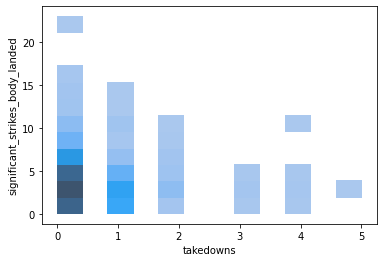

In [94]:
sns.histplot(data=expected_by_target, x="takedowns", y="significant_strikes_body_landed" , bins=12)

<AxesSubplot:xlabel='body_accuracy_fw', ylabel='Count'>

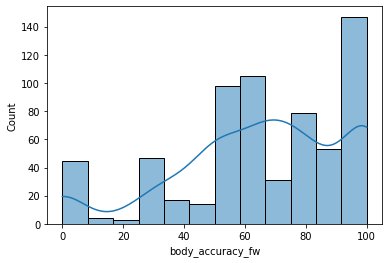

In [95]:
sns.histplot(data=expected_by_target, x="body_accuracy_fw", kde=True)

<AxesSubplot:xlabel='body_accuracy_fw'>

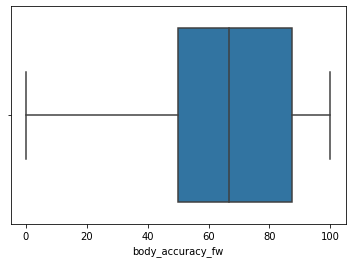

In [96]:
sns.boxplot(data=expected_by_target, x="body_accuracy_fw")

<AxesSubplot:xlabel='leg_accuracy_fw', ylabel='Count'>

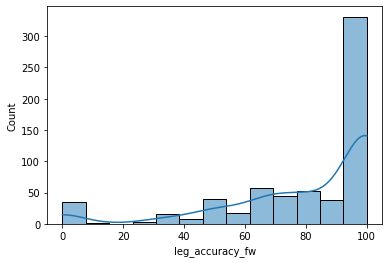

In [97]:
sns.histplot(data=expected_by_target, x="leg_accuracy_fw", kde=True)

<AxesSubplot:xlabel='leg_accuracy_fw'>

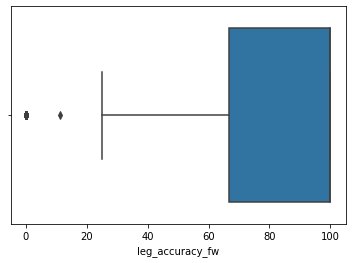

In [98]:
sns.boxplot(data=expected_by_target, x="leg_accuracy_fw")

In [99]:
expected_by_target.body_accuracy_fw.median()

66.66666666666666

In [100]:
print(head_accuracy_avg)
print(body_accuracy_avg)
print(leg_accuracy_avg)

#print(fw_performance.columns)
expected_by_target['significant_strikes_head_attempted'] = expected_by_target['significant_strikes_head_attempted'].astype(int)
expected_by_target['expected_head_lands'] = expected_by_target.significant_strikes_head_attempted * head_accuracy_avg


expected_by_target['significant_strikes_body_attempted'] = expected_by_target['significant_strikes_body_attempted'].astype(int)
expected_by_target['expected_body_lands'] = expected_by_target.significant_strikes_body_attempted * body_accuracy_avg


expected_by_target['significant_strikes_leg_attempted'] = expected_by_target['significant_strikes_leg_attempted'].astype(int)
expected_by_target['expected_leg_lands'] = expected_by_target.significant_strikes_leg_attempted * leg_accuracy_avg

expected_by_target.head(20)

32.26032561486461
65.63404771975117
80.32315830824356


,significant_strikes_head_landed,significant_strikes_head_attempted,significant_strikes_body_landed,significant_strikes_body_attempted,significant_strikes_leg_landed,significant_strikes_leg_attempted,takedowns_attempted,takedowns,unique_round_id,winning_fighter_name,losing_fighter_name,head_accuracy_fw,body_accuracy_fw,leg_accuracy_fw,expected_head_lands,expected_body_lands,expected_leg_lands
0,12,47,1,4,4,4,3,0,454,Brian Ortega,Clay Guida,25.531915,25.000000,100.000000,1516.235304,262.536191,321.292633
1,16,62,6,7,3,3,3,0,456,Brian Ortega,Clay Guida,25.806452,85.714286,100.000000,2000.140188,459.438334,240.969475
2,28,78,3,4,1,1,0,0,457,Brian Ortega,Clay Guida,35.897436,75.000000,100.000000,2516.305398,262.536191,80.323158
3,18,43,9,13,12,14,3,0,465,Yair Rodriguez,Jeremy Stephens,41.860465,69.230769,85.714286,1387.194001,853.242620,1124.524216
4,3,14,4,4,4,6,0,0,466,Yair Rodriguez,Jeremy Stephens,21.428571,100.000000,66.666667,451.644559,262.536191,481.938950
5,37,67,2,4,2,2,0,0,467,Yair Rodriguez,Jeremy Stephens,55.223881,50.000000,100.000000,2161.441816,262.536191,160.646317
6,9,19,2,2,0,1,1,1,468,Yair Rodriguez,Jeremy Stephens,47.368421,100.000000,0.000000,612.946187,131.268095,80.323158
7,10,17,3,6,3,4,0,0,469,Yair Rodriguez,Jeremy Stephens,58.823529,50.000000,75.000000,548.425535,393.804286,321.292633
8,23,43,4,4,1,2,3,2,470,Yair Rodriguez,Jeremy Stephens,53.488372,100.000000,50.000000,1387.194001,262.536191,160.646317
9,21,55,3,3,5,5,0,0,473,Jose Aldo,Jeremy Stephens,38.181818,100.000000,100.000000,1774.317909,196.902143,401.615792


Text(0.5, 1.0, 'Expected Head strike lands vs. Actual Head lands')

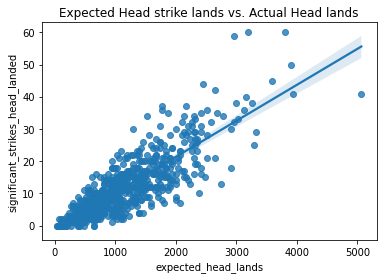

In [101]:
sns.regplot(data=expected_by_target, y='significant_strikes_head_landed', x='expected_head_lands')
plt.title('Expected Head strike lands vs. Actual Head lands')

Text(0.5, 1.0, 'Expected Body strike lands vs. Actual Body lands')

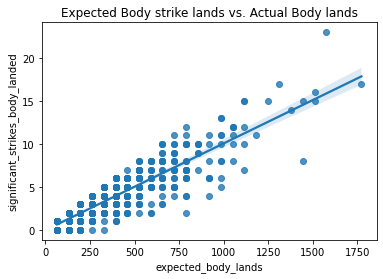

In [102]:
sns.regplot(data=expected_by_target, y='significant_strikes_body_landed', x='expected_body_lands')
plt.title('Expected Body strike lands vs. Actual Body lands')

Text(0.5, 1.0, 'Expected leg strike lands vs. Actual leg lands')

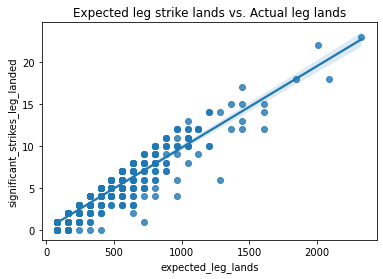

In [103]:
sns.regplot(data=expected_by_target, y='significant_strikes_leg_landed', x='expected_leg_lands')
plt.title('Expected leg strike lands vs. Actual leg lands')

In [104]:
expected_grappling = df_fw[[ 'takedowns', 'takedowns_attempted','unique_round_id', 'winning_fighter_name','losing_fighter_name']]

expected_grappling['takedown_accuracy_fw'] = expected_grappling.takedowns / expected_grappling.takedowns_attempted

expected_grappling = expected_grappling.dropna()
expected_grappling = expected_grappling.reset_index(drop=True)


takedown_accuracy_avg_fw = expected_grappling['takedown_accuracy_fw'].mean()

expected_grappling.head(20)

<ipython-input-104-ac90461f58ce>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expected_grappling['takedown_accuracy_fw'] = expected_grappling.takedowns / expected_grappling.takedowns_attempted


,takedowns,takedowns_attempted,unique_round_id,winning_fighter_name,losing_fighter_name,takedown_accuracy_fw
0,1,1,451,Thiago Tavares,Clay Guida,1.000000
1,0,3,454,Brian Ortega,Clay Guida,0.000000
2,0,3,456,Brian Ortega,Clay Guida,0.000000
3,0,3,465,Yair Rodriguez,Jeremy Stephens,0.000000
4,1,1,468,Yair Rodriguez,Jeremy Stephens,1.000000
5,2,3,470,Yair Rodriguez,Jeremy Stephens,0.666667
6,1,1,476,Renato Moicano,Jeremy Stephens,1.000000
7,0,1,477,Renato Moicano,Jeremy Stephens,0.000000
8,0,1,478,Renato Moicano,Jeremy Stephens,0.000000
9,1,3,480,Renato Moicano,Jeremy Stephens,0.333333


In [105]:
print(takedown_accuracy_avg_fw)

0.3954921830628046


In [106]:
expected_grappling['takedowns_attempted'] = expected_grappling['takedowns_attempted'].astype(int)
expected_grappling['expected_takedowns'] = expected_grappling.takedowns_attempted * takedown_accuracy_avg_fw

expected_grappling.head(20)

,takedowns,takedowns_attempted,unique_round_id,winning_fighter_name,losing_fighter_name,takedown_accuracy_fw,expected_takedowns
0,1,1,451,Thiago Tavares,Clay Guida,1.000000,0.395492
1,0,3,454,Brian Ortega,Clay Guida,0.000000,1.186477
2,0,3,456,Brian Ortega,Clay Guida,0.000000,1.186477
3,0,3,465,Yair Rodriguez,Jeremy Stephens,0.000000,1.186477
4,1,1,468,Yair Rodriguez,Jeremy Stephens,1.000000,0.395492
5,2,3,470,Yair Rodriguez,Jeremy Stephens,0.666667,1.186477
6,1,1,476,Renato Moicano,Jeremy Stephens,1.000000,0.395492
7,0,1,477,Renato Moicano,Jeremy Stephens,0.000000,0.395492
8,0,1,478,Renato Moicano,Jeremy Stephens,0.000000,0.395492
9,1,3,480,Renato Moicano,Jeremy Stephens,0.333333,1.186477


<AxesSubplot:xlabel='takedowns_attempted', ylabel='Count'>

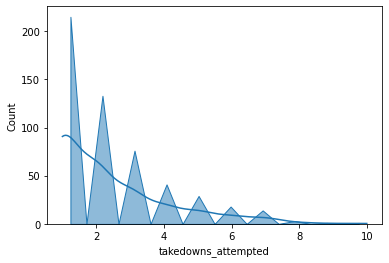

In [107]:
sns.histplot(data=expected_grappling, x="takedowns_attempted", kde=True, element="poly")

Text(0.5, 1.0, 'Expected leg strike lands vs. Actual leg lands')

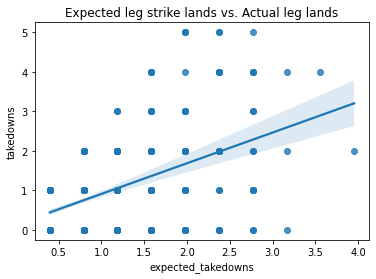

In [108]:
sns.regplot(data=expected_grappling, y='takedowns', x='expected_takedowns')
plt.title('Expected leg strike lands vs. Actual leg lands')

In [109]:
expected_by_location = df_fw[[ 'significant_strikes_clinch_landed', 'significant_strikes_clinch_attempted', 'significant_strikes_ground_landed', 'significant_strikes_ground_attempted', 'unique_round_id', 'winning_fighter_name','losing_fighter_name']]



expected_by_location['clinch_accuracy_fw'] = expected_by_location.significant_strikes_clinch_landed / expected_by_location.significant_strikes_clinch_attempted
expected_by_location['ground_accuracy_fw'] = expected_by_location.significant_strikes_ground_landed / expected_by_location.significant_strikes_ground_attempted


clinch_accuracy_avg = expected_by_location['clinch_accuracy_fw'].mean()
ground_accuracy_avg = expected_by_location['ground_accuracy_fw'].mean()

print(clinch_accuracy_avg)
print(ground_accuracy_avg)

expected_by_location = expected_by_location.dropna()
expected_by_location = expected_by_location.reset_index(drop=True)


expected_by_location['expected_clinch_strikes'] = expected_by_location.significant_strikes_clinch_attempted * clinch_accuracy_avg
expected_by_location['expected_ground_strikes'] = expected_by_location.significant_strikes_ground_attempted * ground_accuracy_avg

expected_by_location.head(20)

0.6447571081990285
0.6938850745173357


<ipython-input-109-0b78423dfe8e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expected_by_location['clinch_accuracy_fw'] = expected_by_location.significant_strikes_clinch_landed / expected_by_location.significant_strikes_clinch_attempted
<ipython-input-109-0b78423dfe8e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expected_by_location['ground_accuracy_fw'] = expected_by_location.significant_strikes_ground_landed / expected_by_location.significant_strikes_ground_attempted


,significant_strikes_clinch_landed,significant_strikes_clinch_attempted,significant_strikes_ground_landed,significant_strikes_ground_attempted,unique_round_id,winning_fighter_name,losing_fighter_name,clinch_accuracy_fw,ground_accuracy_fw,expected_clinch_strikes,expected_ground_strikes
0,4,8,1,1,465,Yair Rodriguez,Jeremy Stephens,0.500000,1.000000,5.158057,0.693885
1,2,2,34,58,467,Yair Rodriguez,Jeremy Stephens,1.000000,0.586207,1.289514,40.245334
2,4,7,6,7,468,Yair Rodriguez,Jeremy Stephens,0.571429,0.857143,4.513300,4.857196
3,0,1,19,26,470,Yair Rodriguez,Jeremy Stephens,0.000000,0.730769,0.644757,18.041012
4,1,1,12,21,473,Jose Aldo,Jeremy Stephens,1.000000,0.571429,0.644757,14.571587
5,2,3,10,11,531,Max Holloway,Ricardo Lamas,0.666667,0.909091,1.934271,7.632736
6,5,7,17,18,535,Chad Mendes,Ricardo Lamas,0.714286,0.944444,4.513300,12.489931
7,8,11,1,3,538,Mirsad Bektic,Ricardo Lamas,0.727273,0.333333,7.092328,2.081655
8,4,6,2,3,587,Jeremy Stephens,Gilbert Melendez,0.666667,0.666667,3.868543,2.081655
9,1,1,0,1,590,Jeremy Stephens,Gilbert Melendez,1.000000,0.000000,0.644757,0.693885


<AxesSubplot:xlabel='clinch_accuracy_fw', ylabel='Count'>

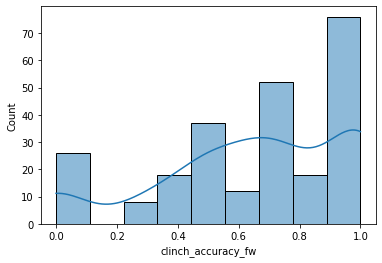

In [110]:
sns.histplot(data=expected_by_location, x="clinch_accuracy_fw", kde=True)

<AxesSubplot:xlabel='ground_accuracy_fw', ylabel='Count'>

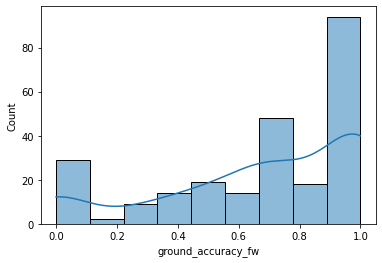

In [111]:
sns.histplot(data=expected_by_location, x="ground_accuracy_fw", kde=True)

<AxesSubplot:xlabel='significant_strikes_clinch_attempted', ylabel='Count'>

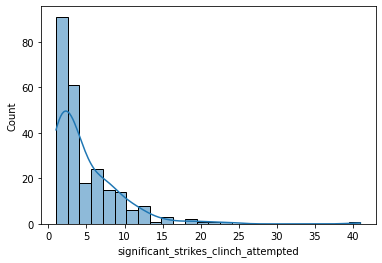

In [112]:
sns.histplot(data=expected_by_location, x="significant_strikes_clinch_attempted", kde=True)

<AxesSubplot:xlabel='significant_strikes_clinch_landed', ylabel='Count'>

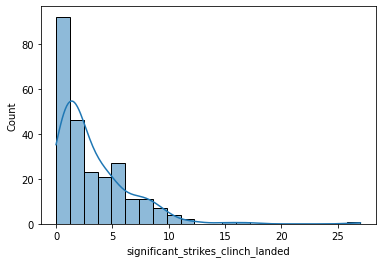

In [113]:
sns.histplot(data=expected_by_location, x="significant_strikes_clinch_landed", kde=True)

<AxesSubplot:xlabel='significant_strikes_ground_attempted', ylabel='Count'>

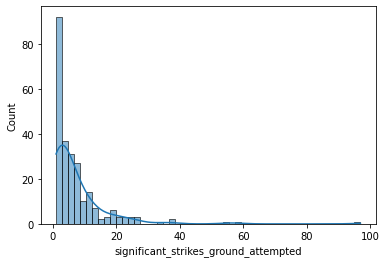

In [114]:
sns.histplot(data=expected_by_location, x="significant_strikes_ground_attempted", kde=True)

<AxesSubplot:xlabel='significant_strikes_ground_landed', ylabel='Count'>

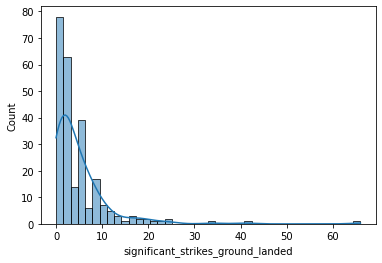

In [115]:
sns.histplot(data=expected_by_location, x="significant_strikes_ground_landed", kde=True)

Text(0.5, 1.0, 'Expected Ground strike lands vs. Actual Ground Strikes')

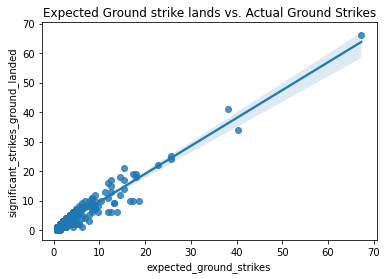

In [116]:
sns.regplot(data=expected_by_location, y='significant_strikes_ground_landed', x='expected_ground_strikes')
plt.title('Expected Ground strike lands vs. Actual Ground Strikes')

Text(0.5, 1.0, 'Expected Ground strike lands vs. Actual Ground Strikes')

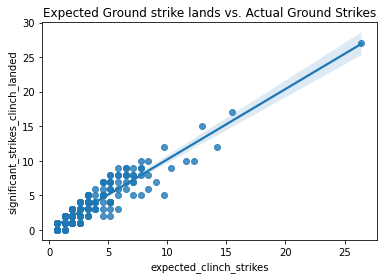

In [117]:
sns.regplot(data=expected_by_location, y='significant_strikes_clinch_landed', x='expected_clinch_strikes')
plt.title('Expected Ground strike lands vs. Actual Ground Strikes')

Examine by location of strikes i.e Standing (all done), Ground, and Clinch

In [118]:
df_fw.columns

Index(['fight_id', 'fight_title', 'winning_fighter_name',
       'losing_fighter_name', 'weight_class', 'method_of_victory',
       'specific_victory_details', 'ending_round', 'ending_time', 'fight_url',
       'unique_round_id', 'unique_fight_id', 'unique_event_id', 'round_number',
       'fighter_name', 'knockdowns', 'total_strikes_landed',
       'total_strikes_attempted', 'takedowns', 'takedowns_attempted',
       'submission_attempts', 'guard_passes', 'reversals', 'control_time',
       'unique_round_id.1', 'unique_fight_id.1', 'unique_event_id.1',
       'round_number.1', 'fighter_name.1', 'significant_strikes_head_landed',
       'significant_strikes_head_attempted', 'significant_strikes_body_landed',
       'significant_strikes_body_attempted', 'significant_strikes_leg_landed',
       'significant_strikes_leg_attempted',
       'significant_strikes_standing_landed',
       'significant_strikes_standing_attempted',
       'significant_strikes_clinch_landed',
       'significant_

In [119]:
#striking accuray per round 

sapr_fw = df_fw[['total_strikes_landed', 'total_strikes_attempted', 'fighter_name', 'round_number', 'significant_strikes_head_attempted', 'significant_strikes_head_landed', 'significant_strikes_body_attempted', 'significant_strikes_body_landed', 'significant_strikes_leg_attempted', 'significant_strikes_leg_landed', 'standing_time']].groupby(['fighter_name', 'round_number']).mean().reset_index()
sapr_fw['standing_time']=sapr_fw.standing_time/60
sapr_fw['standing_accuracy'] = (sapr_fw.total_strikes_landed / sapr_fw.total_strikes_attempted) * 100

# graphs for head accuracy, body accuracy and leg accuracy by round

sapr_fw['head_accuracy']=(sapr_fw.significant_strikes_head_landed/sapr_fw.significant_strikes_head_attempted)*100
sapr_fw['body_accuracy']=(sapr_fw.significant_strikes_body_landed/sapr_fw.significant_strikes_body_attempted)*100
sapr_fw['leg_accuracy']=(sapr_fw.significant_strikes_leg_landed/sapr_fw.significant_strikes_leg_attempted)*100

print('Standing Accuracy by round')
sapr_fw[['fighter_name', 'round_number', 'standing_accuracy', 'head_accuracy', 'body_accuracy', 'leg_accuracy']]


Standing Accuracy by round


,fighter_name,round_number,standing_accuracy,head_accuracy,body_accuracy,leg_accuracy
0,Akira Corassani,1,35.294118,25.000000,25.000000,80.000000
1,Alex Caceres,1,52.914798,39.490446,81.250000,86.363636
2,Alex Caceres,2,45.408163,36.486486,70.967742,75.000000
3,Alex Caceres,3,47.445255,40.740741,80.000000,75.000000
4,Alex Caceres,4,26.415094,24.489796,66.666667,0.000000
...,...,...,...,...,...,...
411,Yui Chul Nam,3,50.617284,21.951220,50.000000,80.000000
412,Zabit Magomedsharipov,1,53.669725,40.140845,60.000000,90.909091
413,Zabit Magomedsharipov,2,56.730769,43.511450,43.750000,100.000000
414,Zabit Magomedsharipov,3,47.191011,35.087719,28.571429,92.857143


In [120]:
df_lw = pd.read_csv('lw_historical.csv', error_bad_lines=False)
df_lw.dropna()

df_lw = df_lw.loc[df_lw.control_time != '--']


df_lw['seconds'] = df_lw['control_time'].str.split(':',expand=True)[1]
df_lw['minutes'] = df_lw['control_time'].str.split(':',expand=True)[0]

df_lw['seconds'] = df_lw['seconds'].astype(dtype=int)
df_lw['minutes'] = df_lw['minutes'].astype(dtype=int)

df_lw['control_time'] = (df_lw['minutes'] * 60) + df_lw['seconds']
df_lw = df_lw.drop(columns=['seconds','minutes'])


df_lw['seconds'] = df_lw.ending_time.str.split(':',expand=True)[1]
df_lw['minutes'] = df_lw.ending_time.str.split(':',expand=True)[0]

df_lw['seconds'] = df_lw['seconds'].astype(int)
df_lw['minutes'] = df_lw['minutes'].astype(int)

df_lw['ending_time'] = (df_lw['minutes'] * 60) + df_lw['seconds']
df_lw = df_lw.drop(columns=['seconds','minutes'])

df_lw['standing_time'] = df_lw.ending_time - df_lw.control_time

df_lw.loc[df_lw.round_number != df_lw.ending_round,'ending_time'] = 300
print(df_lw.columns)

Index(['fight_id', 'fight_title', 'winning_fighter_name',
       'losing_fighter_name', 'weight_class', 'method_of_victory',
       'specific_victory_details', 'ending_round', 'ending_time', 'fight_url',
       'unique_round_id', 'unique_fight_id', 'unique_event_id', 'round_number',
       'fighter_name', 'knockdowns', 'total_strikes_landed',
       'total_strikes_attempted', 'takedowns', 'takedowns_attempted',
       'submission_attempts', 'guard_passes', 'reversals', 'control_time',
       'unique_round_id.1', 'unique_fight_id.1', 'unique_event_id.1',
       'round_number.1', 'fighter_name.1', 'significant_strikes_head_landed',
       'significant_strikes_head_attempted', 'significant_strikes_body_landed',
       'significant_strikes_body_attempted', 'significant_strikes_leg_landed',
       'significant_strikes_leg_attempted',
       'significant_strikes_standing_landed',
       'significant_strikes_standing_attempted',
       'significant_strikes_clinch_landed',
       'significant_

In [121]:
df_lw.head()

,fight_id,fight_title,winning_fighter_name,losing_fighter_name,weight_class,method_of_victory,specific_victory_details,ending_round,ending_time,fight_url,unique_round_id,unique_fight_id,unique_event_id,round_number,fighter_name,knockdowns,total_strikes_landed,total_strikes_attempted,takedowns,takedowns_attempted,submission_attempts,guard_passes,reversals,control_time,unique_round_id.1,unique_fight_id.1,unique_event_id.1,round_number.1,fighter_name.1,significant_strikes_head_landed,significant_strikes_head_attempted,significant_strikes_body_landed,significant_strikes_body_attempted,significant_strikes_leg_landed,significant_strikes_leg_attempted,significant_strikes_standing_landed,significant_strikes_standing_attempted,significant_strikes_clinch_landed,significant_strikes_clinch_attempted,significant_strikes_ground_landed,significant_strikes_ground_attempted,standing_time
0,2089,UFC 226: Miocic vs. Cormier,Anthony Pettis,Michael Chiesa,Lightweight,SUB,Triangle Choke,2,300,d3f26e0fbf694375,1,2089,197,1,Michael Chiesa,0,17,32,2,6,0,1,0,129,1,2089,197,1,Michael Chiesa,4,17,6,6,1,1,7,19,3,3,1,2,-77
1,2089,UFC 226: Miocic vs. Cormier,Anthony Pettis,Michael Chiesa,Lightweight,SUB,Triangle Choke,2,300,d3f26e0fbf694375,2,2089,197,1,Anthony Pettis,0,11,21,0,0,0,0,0,58,2,2089,197,1,Anthony Pettis,2,10,3,4,2,3,5,14,1,1,1,2,-6
2,2089,UFC 226: Miocic vs. Cormier,Anthony Pettis,Michael Chiesa,Lightweight,SUB,Triangle Choke,2,52,d3f26e0fbf694375,3,2089,197,2,Michael Chiesa,0,2,3,0,0,0,0,0,29,3,2089,197,2,Michael Chiesa,0,0,1,1,0,1,1,2,0,0,0,0,23
3,2089,UFC 226: Miocic vs. Cormier,Anthony Pettis,Michael Chiesa,Lightweight,SUB,Triangle Choke,2,52,d3f26e0fbf694375,4,2089,197,2,Anthony Pettis,0,2,5,0,0,2,0,0,6,4,2089,197,2,Anthony Pettis,1,3,1,2,0,0,2,5,0,0,0,0,46
4,2334,UFC Fight Night: Souza vs Mousasi,Joe Lauzon,Michael Chiesa,Lightweight,KO/TKO,NaN,2,300,c9733393385105cb,5,2334,219,1,Joe Lauzon,0,25,41,1,5,0,1,1,151,5,2334,219,1,Joe Lauzon,9,21,0,0,0,0,3,12,0,0,6,9,-17


In [122]:
df_lw.shape

(960, 42)

In [123]:
# creating the group frame

group_frame_lw = df_lw[['fighter_name', 'significant_strikes_standing_attempted', 'significant_strikes_standing_landed','significant_strikes_head_attempted','significant_strikes_body_attempted','significant_strikes_leg_attempted', 'significant_strikes_ground_attempted', 'significant_strikes_clinch_attempted', 'knockdowns', 'standing_time' ]].groupby('fighter_name').sum().reset_index()
group_frame_lw.head(30)

,fighter_name,significant_strikes_standing_attempted,significant_strikes_standing_landed,significant_strikes_head_attempted,significant_strikes_body_attempted,significant_strikes_leg_attempted,significant_strikes_ground_attempted,significant_strikes_clinch_attempted,knockdowns,standing_time
0,Aaron Riley,49,11,35,7,7,0,0,0,300
1,Abel Trujillo,62,12,75,4,0,0,17,1,398
2,Adriano Martins,14,10,17,3,2,8,0,0,94
3,Akbarh Arreola,87,37,84,15,16,26,2,1,1381
4,Al Iaquinta,1309,530,1102,172,97,28,34,6,6957
5,Alan Patrick,121,32,103,22,9,0,13,0,800
6,Alex Oliveira,138,50,162,15,8,4,43,1,534
7,Alex White,214,74,233,50,9,4,74,3,2325
8,Alexander Hernandez,183,63,122,78,9,3,23,1,1345
9,Alexander Yakovlev,87,27,93,20,8,21,13,1,1248


In [124]:
group_frame_lw['head_ratio'] = group_frame_lw.significant_strikes_head_attempted / (group_frame_lw.significant_strikes_head_attempted + group_frame_lw.significant_strikes_body_attempted + group_frame_lw.significant_strikes_leg_attempted)
group_frame_lw['body_ratio'] = group_frame_lw.significant_strikes_body_attempted / (group_frame_lw.significant_strikes_head_attempted + group_frame_lw.significant_strikes_body_attempted + group_frame_lw.significant_strikes_leg_attempted)
group_frame_lw['leg_ratio'] = group_frame_lw.significant_strikes_leg_attempted / (group_frame_lw.significant_strikes_head_attempted + group_frame_lw.significant_strikes_body_attempted + group_frame_lw.significant_strikes_leg_attempted)


<AxesSubplot:xlabel='significant_strikes_standing_attempted', ylabel='Count'>

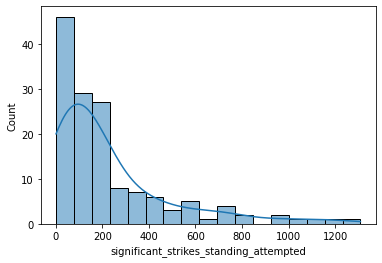

In [125]:
sns.histplot(data=group_frame_lw, x="significant_strikes_standing_attempted", kde=True)
#overall career numbers

In [126]:
group_frame_lw.loc[ group_frame_lw.significant_strikes_standing_attempted == group_frame_lw.significant_strikes_standing_attempted.max()]

,fighter_name,significant_strikes_standing_attempted,significant_strikes_standing_landed,significant_strikes_head_attempted,significant_strikes_body_attempted,significant_strikes_leg_attempted,significant_strikes_ground_attempted,significant_strikes_clinch_attempted,knockdowns,standing_time,head_ratio,body_ratio,leg_ratio
4,Al Iaquinta,1309,530,1102,172,97,28,34,6,6957,0.803793,0.125456,0.070751


In [127]:
group_frame_lw.loc[ group_frame_lw.significant_strikes_standing_attempted == group_frame_lw.significant_strikes_standing_attempted.min()]

,fighter_name,significant_strikes_standing_attempted,significant_strikes_standing_landed,significant_strikes_head_attempted,significant_strikes_body_attempted,significant_strikes_leg_attempted,significant_strikes_ground_attempted,significant_strikes_clinch_attempted,knockdowns,standing_time,head_ratio,body_ratio,leg_ratio
27,Colton Smith,1,0,1,1,1,0,2,0,28,0.333333,0.333333,0.333333
66,Jens Pulver,1,0,1,0,0,0,0,0,17,1.000000,0.000000,0.000000


<AxesSubplot:xlabel='significant_strikes_head_attempted', ylabel='Count'>

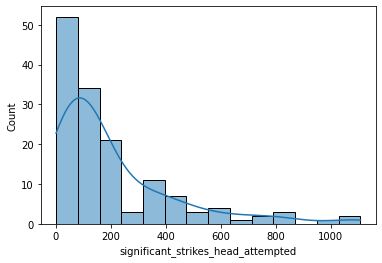

In [128]:
sns.histplot(data=group_frame_lw, x="significant_strikes_head_attempted", kde=True)

<AxesSubplot:xlabel='significant_strikes_body_attempted', ylabel='Count'>

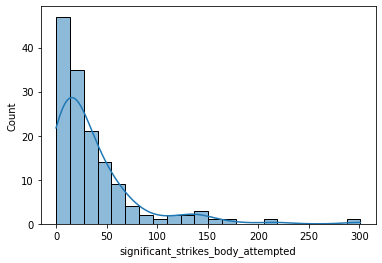

In [129]:
sns.histplot(data=group_frame_lw, x="significant_strikes_body_attempted", kde=True)

In [130]:
group_frame_lw.loc[ group_frame_lw.significant_strikes_body_attempted == group_frame_lw.significant_strikes_body_attempted.max()]

,fighter_name,significant_strikes_standing_attempted,significant_strikes_standing_landed,significant_strikes_head_attempted,significant_strikes_body_attempted,significant_strikes_leg_attempted,significant_strikes_ground_attempted,significant_strikes_clinch_attempted,knockdowns,standing_time,head_ratio,body_ratio,leg_ratio
102,Michael Johnson,1191,450,832,301,118,4,56,1,5091,0.665068,0.240608,0.094325


In [131]:
ratio_frame_lw = group_frame_lw[['fighter_name', 'head_ratio', 'body_ratio', 'leg_ratio' ]]
print('Mix Strikes')
ratio_frame_lw.head(148)

Mix Strikes


,fighter_name,head_ratio,body_ratio,leg_ratio
0,Aaron Riley,0.714286,0.142857,0.142857
1,Abel Trujillo,0.949367,0.050633,0.000000
2,Adriano Martins,0.772727,0.136364,0.090909
3,Akbarh Arreola,0.730435,0.130435,0.139130
4,Al Iaquinta,0.803793,0.125456,0.070751
...,...,...,...,...
139,Tyson Griffin,0.781609,0.183908,0.034483
140,Valmir Lazaro,0.830709,0.118110,0.051181
141,Vinc Pichel,0.601770,0.159292,0.238938
142,Will Brooks,0.660000,0.253333,0.086667


In [132]:
print('Average Strike Mix ratios of LW')
ratio_frame_lw.mean()

Average Strike Mix ratios of LW


head_ratio    0.761955
body_ratio    0.138499
leg_ratio     0.099546
dtype: float64

In [133]:
#STRIKE LOCATION
location_ratio_lw = group_frame_lw[['fighter_name', 'significant_strikes_standing_attempted', 'significant_strikes_ground_attempted', 'significant_strikes_clinch_attempted']].groupby('fighter_name').sum().reset_index()

In [134]:
location_ratio_lw['standing_ratio'] = location_ratio_lw.significant_strikes_standing_attempted / (location_ratio_lw.significant_strikes_standing_attempted + location_ratio_lw.significant_strikes_ground_attempted + location_ratio_lw.significant_strikes_clinch_attempted)
location_ratio_lw['ground_ratio'] = location_ratio_lw.significant_strikes_ground_attempted / (location_ratio_lw.significant_strikes_standing_attempted + location_ratio_lw.significant_strikes_ground_attempted + location_ratio_lw.significant_strikes_clinch_attempted)
location_ratio_lw['clinch_ratio'] = location_ratio_lw.significant_strikes_clinch_attempted / (location_ratio_lw.significant_strikes_standing_attempted + location_ratio_lw.significant_strikes_ground_attempted + location_ratio_lw.significant_strikes_clinch_attempted)

print('Strike Location')
location_ratio_lw[['fighter_name', 'standing_ratio', 'ground_ratio', 'clinch_ratio']]

Strike Location


,fighter_name,standing_ratio,ground_ratio,clinch_ratio
0,Aaron Riley,1.000000,0.000000,0.000000
1,Abel Trujillo,0.784810,0.000000,0.215190
2,Adriano Martins,0.636364,0.363636,0.000000
3,Akbarh Arreola,0.756522,0.226087,0.017391
4,Al Iaquinta,0.954778,0.020423,0.024799
...,...,...,...,...
139,Tyson Griffin,0.666667,0.218391,0.114943
140,Valmir Lazaro,0.960630,0.000000,0.039370
141,Vinc Pichel,0.504425,0.221239,0.274336
142,Will Brooks,0.706667,0.040000,0.253333


In [135]:
print('Average Lw Fight locations')
#advise should probably drop some fighters as they have extreme values
location_ratio_lw[['fighter_name', 'standing_ratio', 'ground_ratio', 'clinch_ratio']].mean()


Average Lw Fight locations


standing_ratio    0.819711
ground_ratio      0.087456
clinch_ratio      0.092832
dtype: float64

In [136]:
expected_by_target_lw = df_lw[[ 'significant_strikes_head_landed', 'significant_strikes_head_attempted', 'significant_strikes_body_landed', 'significant_strikes_body_attempted', 'significant_strikes_leg_landed','significant_strikes_leg_attempted', 'takedowns_attempted', 'takedowns', 'unique_round_id', 'winning_fighter_name','losing_fighter_name']]

expected_by_target_lw['head_accuracy_lw'] = expected_by_target_lw.significant_strikes_head_landed / expected_by_target_lw.significant_strikes_head_attempted * 100
expected_by_target_lw['body_accuracy_lw'] = expected_by_target_lw.significant_strikes_body_landed / expected_by_target_lw.significant_strikes_body_attempted * 100
expected_by_target_lw['leg_accuracy_lw'] = expected_by_target_lw.significant_strikes_leg_landed / expected_by_target_lw.significant_strikes_leg_attempted * 100





expected_by_target_lw = expected_by_target_lw.dropna()
expected_by_target_lw = expected_by_target_lw.reset_index(drop=True)

head_accuracy_avg_lw = expected_by_target_lw['head_accuracy_lw'].mean()
body_accuracy_avg_lw = expected_by_target_lw['body_accuracy_lw'].mean()
leg_accuracy_avg_lw = expected_by_target_lw['leg_accuracy_lw'].mean()

print(head_accuracy_avg_lw)
print(body_accuracy_avg_lw)
print(leg_accuracy_avg_lw)


expected_by_target_lw.head(20)


31.685994043427122
64.50435254752306
81.62854584049855


<ipython-input-136-78229188b346>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expected_by_target_lw['head_accuracy_lw'] = expected_by_target_lw.significant_strikes_head_landed / expected_by_target_lw.significant_strikes_head_attempted * 100
<ipython-input-136-78229188b346>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expected_by_target_lw['body_accuracy_lw'] = expected_by_target_lw.significant_strikes_body_landed / expected_by_target_lw.significant_strikes_body_attempted * 100
<ipython-input-136-782

,significant_strikes_head_landed,significant_strikes_head_attempted,significant_strikes_body_landed,significant_strikes_body_attempted,significant_strikes_leg_landed,significant_strikes_leg_attempted,takedowns_attempted,takedowns,unique_round_id,winning_fighter_name,losing_fighter_name,head_accuracy_lw,body_accuracy_lw,leg_accuracy_lw
0,4,17,6,6,1,1,6,2,1,Anthony Pettis,Michael Chiesa,23.529412,100.000000,100.000000
1,2,10,3,4,2,3,0,0,2,Anthony Pettis,Michael Chiesa,20.000000,75.000000,66.666667
2,8,23,6,7,5,5,3,1,6,Joe Lauzon,Michael Chiesa,34.782609,85.714286,100.000000
3,6,17,4,4,1,1,1,0,8,Joe Lauzon,Michael Chiesa,35.294118,100.000000,100.000000
4,9,38,2,2,1,1,1,0,45,Eddie Alvarez,Rafael Dos Anjos,23.684211,100.000000,100.000000
5,34,67,8,8,3,3,3,1,46,Eddie Alvarez,Rafael Dos Anjos,50.746269,100.000000,100.000000
6,1,12,2,2,1,1,0,0,47,Jeremy Stephens,Rafael Dos Anjos,8.333333,100.000000,100.000000
7,7,18,3,4,2,2,0,0,49,Jeremy Stephens,Rafael Dos Anjos,38.888889,75.000000,100.000000
8,9,15,1,2,2,2,0,0,59,Al Iaquinta,Diego Sanchez,60.000000,50.000000,100.000000
9,15,54,3,5,1,1,0,0,77,Rafael Dos Anjos,Anthony Pettis,27.777778,60.000000,100.000000


<AxesSubplot:xlabel='significant_strikes_head_attempted', ylabel='Count'>

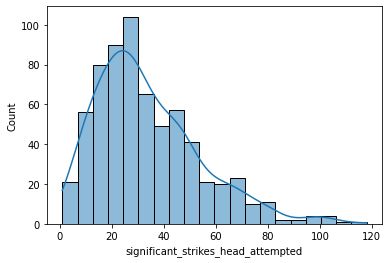

In [137]:
sns.histplot(data=expected_by_target_lw, x="significant_strikes_head_attempted", kde=True)